In [3]:
# ËÆæÁΩÆÊòæÁ§∫ÊâÄÊúâË°åÁöÑÈÄâÈ°π
import pandas as pd
pd.set_option('display.max_rows', None)

#Ëß£ÂÜ≥‰∏≠ÊñáÊòæÁ§∫‰π±Á†Å
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import os
import sys

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÔºåÊ†πÊçÆÊìç‰ΩúÁ≥ªÁªüÈÄâÊã©ÂêàÈÄÇÁöÑÂ≠ó‰Ωì
def set_chinese_font():
    # Ê£ÄÊµãÊìç‰ΩúÁ≥ªÁªü
    if sys.platform.startswith('win'):  # Windows
        # Â∏∏ËßÅÁöÑWindows‰∏≠ÊñáÂ≠ó‰Ωì
        windows_fonts = ['SimHei', 'Microsoft YaHei', 'SimSun']
        for font in windows_fonts:
            if any(font.lower() in f.name.lower() for f in font_manager.fontManager.ttflist):
                plt.rcParams['font.family'] = font
                print(f"‰ΩøÁî®Windows‰∏≠ÊñáÂ≠ó‰Ωì: {font}")
                return True
    elif sys.platform.startswith('darwin'):  # macOS
        # Â∏∏ËßÅÁöÑmacOS‰∏≠ÊñáÂ≠ó‰Ωì
        mac_fonts = ['PingFang SC', 'Heiti SC', 'STHeiti']
        for font in mac_fonts:
            if any(font.lower() in f.name.lower() for f in font_manager.fontManager.ttflist):
                plt.rcParams['font.family'] = font
                print(f"‰ΩøÁî®macOS‰∏≠ÊñáÂ≠ó‰Ωì: {font}")
                return True
    elif sys.platform.startswith('linux'):  # Linux
        # Â∏∏ËßÅÁöÑLinux‰∏≠ÊñáÂ≠ó‰Ωì
        linux_fonts = ['WenQuanYi Micro Hei', 'Noto Sans CJK SC']
        for font in linux_fonts:
            if any(font.lower() in f.name.lower() for f in font_manager.fontManager.ttflist):
                plt.rcParams['font.family'] = font
                print(f"‰ΩøÁî®Linux‰∏≠ÊñáÂ≠ó‰Ωì: {font}")
                return True
    
    # Êâæ‰∏çÂà∞ÁâπÂÆöÂ≠ó‰ΩìÊó∂ÔºåÂ∞ùËØïÊâæ‰ªª‰ΩïÂåÖÂê´"Noto Sans"ÁöÑÂ≠ó‰Ωì
    for font in font_manager.fontManager.ttflist:
        if 'noto sans' in font.name.lower():
            plt.rcParams['font.family'] = font.name
            print(f"‰ΩøÁî®Noto SansÂ≠ó‰Ωì: {font.name}")
            return True
    
    # ÊòæÁ§∫ÊâÄÊúâÂèØÁî®Â≠ó‰Ωì
    print("ÂèØÁî®Â≠ó‰Ωì:")
    for font in sorted([f.name for f in font_manager.fontManager.ttflist]):
        print(font)
    
    # ‰ΩøÁî®ÈªòËÆ§Â≠ó‰Ωì
    plt.rcParams['axes.unicode_minus'] = False  # Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
    return False

# Â∞ùËØïËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
set_chinese_font()

‰ΩøÁî®Windows‰∏≠ÊñáÂ≠ó‰Ωì: SimHei


True

In [4]:
import re
import pandas as pd

# ËØªÂèñExcelÊñá‰ª∂
df = pd.read_excel("BOSS_Zhipin_Sample_Data.xlsx")

# ÊòæÁ§∫ÂâçÂá†Ë°åÊï∞ÊçÆ
print(df.head())

  ÂèëÂ∏ÉÂüéÂ∏Ç       ÂüéÂ∏Ç‰ª£Á†Å                                               ËÅå‰ΩçÈìæÊé•  \
0   Âåó‰∫¨  101010100  https://www.zhipin.com/job_detail/a93aa4c3b597...   
1   Âåó‰∫¨  101010100  https://www.zhipin.com/job_detail/c49e5ef36818...   
2   Âåó‰∫¨  101010100  https://www.zhipin.com/job_detail/5a8dd742d630...   
3   Âåó‰∫¨  101010100  https://www.zhipin.com/job_detail/15b961c17d60...   
4   Âåó‰∫¨  101010100  https://www.zhipin.com/job_detail/676af5373033...   

             ËÅå‰ΩçÂêçÁß∞          Ëñ™ËµÑ Â∑•‰ΩúÂú∞ÁÇπ   ÁªèÈ™åË¶ÅÊ±Ç  Â≠¶ÂéÜË¶ÅÊ±Ç  ÂÖ¨Âè∏ÂêçÁß∞  \
0  ÂºÄÂèëÊµãËØïÂ∑•Á®ãÂ∏àÔºàÊúçÂä°Á´ØÊñπÂêëÔºâ  20-35K¬∑16Ëñ™   Âåó‰∫¨   1-3Âπ¥    Êú¨Áßë    ÁôæÂ∫¶   
1         Â©öÁ§ºÂÆ¥‰ºöËÆæËÆ°Â∏à       8-12K   Âåó‰∫¨   1-3Âπ¥    Êú¨Áßë  ÁöìË∑ÉÂåóÁ¶æ   
2     ‰∫¨‰∏úÊó•ÁªìÂ∑• 400/Â§©       8-13K   Âåó‰∫¨   ÁªèÈ™å‰∏çÈôê  Â≠¶ÂéÜ‰∏çÈôê   Ê∏åÊ∫êËææ   
3       ËµÑÊ∑±Ê∏∏ÊàèÁïåÈù¢ËÆæËÆ°Â∏à  30-60K¬∑14Ëñ™   Âåó‰∫¨  5-10Âπ¥  Â≠¶ÂéÜ‰∏çÈôê  Áê•ÁèÄÂàõÊÉ≥   
4            ÂìÅÁâåËê•ÈîÄ  20-35K¬∑1

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109986 entries, 0 to 109985
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ÂèëÂ∏ÉÂüéÂ∏Ç    109986 non-null  object
 1   ÂüéÂ∏Ç‰ª£Á†Å    109986 non-null  int64 
 2   ËÅå‰ΩçÈìæÊé•    109986 non-null  object
 3   ËÅå‰ΩçÂêçÁß∞    109901 non-null  object
 4   Ëñ™ËµÑ      109949 non-null  object
 5   Â∑•‰ΩúÂú∞ÁÇπ    109839 non-null  object
 6   ÁªèÈ™åË¶ÅÊ±Ç    109954 non-null  object
 7   Â≠¶ÂéÜË¶ÅÊ±Ç    109957 non-null  object
 8   ÂÖ¨Âè∏ÂêçÁß∞    109961 non-null  object
 9   Ëñ™ËµÑËØ¶ÊÉÖ    42938 non-null   object
 10  ËÅå‰ΩçÂÖ≥ÈîÆÂ≠ó   102437 non-null  object
 11  ËÅå‰ΩçÊèèËø∞    109898 non-null  object
 12  ËÅå‰ΩçÁ¶èÂà©    66154 non-null   object
 13  ËûçËµÑÊÉÖÂÜµ    54104 non-null   object
 14  ÂÖ¨Âè∏ËßÑÊ®°    109970 non-null  object
 15  ÂÖ¨Âè∏Ë°å‰∏ö    109970 non-null  object
dtypes: int64(1), object(15)
memory usage: 13.4+ MB
None


In [7]:
# Êü•ÁúãÂêÑÂàóÂàóÁöÑÊèèËø∞ÂàÜÊûê

#description = df['ËÅå‰ΩçÂêçÁß∞'].describe()
description = df['Ëñ™ËµÑ'].describe()
#description = df['Â∑•‰ΩúÂú∞ÁÇπ'].describe()
#description = df['ÁªèÈ™åË¶ÅÊ±Ç'].describe()
#description = df['Â≠¶ÂéÜË¶ÅÊ±Ç'].describe()
#description = df['ËÅå‰ΩçÊèèËø∞'].describe()
#description = df['ÂÖ¨Âè∏ËßÑÊ®°'].describe()
#description = df['ÂÖ¨Âè∏Ë°å‰∏ö'].describe()
print(description)

# Êü•ÊâæÂÖ≥ÈîÆÂàóÁöÑÁ©∫ÂÄºÊÉÖÂÜµ
#empty_rows = df[df['ËÅå‰ΩçÂêçÁß∞'].isnull()]
empty_rows = df[df['Ëñ™ËµÑ'].isnull()]
#empty_rows = df[df['Â∑•‰ΩúÂú∞ÁÇπ'].isnull()]
#empty_rows = df[df['ÁªèÈ™åË¶ÅÊ±Ç'].isnull()]
#empty_rows = df[df['Â≠¶ÂéÜË¶ÅÊ±Ç'].isnull()]
#empty_rows = df[df['ËÅå‰ΩçÊèèËø∞'].isnull()]
#empty_rows = df[df['ÂÖ¨Âè∏ËßÑÊ®°'].isnull()]
#empty_rows = df[df['ÂÖ¨Âè∏Ë°å‰∏ö'].isnull()]
# ÊâìÂç∞ÁªìÊûú
#print(empty_rows)
#print(empty_rows['ÂèëÂ∏ÉÂüéÂ∏Ç'].unique())
#print(len(empty_rows['ÂèëÂ∏ÉÂüéÂ∏Ç'].unique()))

# ÁªèÊü•ÁúãÔºåÁ©∫ÂÄºÂèØËÉΩ‰∏∫Áà¨ÂèñÊï∞ÊçÆÊó∂ÔºåÊ≤°ÊúâÁà¨ÂèñÊàêÂäüÔºå‰πãÂêéÂèØÈáçÊñ∞Áà¨ÂèñÔºåÁÑ∂ÂêéÂ∞ÜÂâ©‰ΩôÁöÑÁ©∫ÂÄºÂà†Èô§

count     109949
unique      1863
top         3-4K
freq        9286
Name: Ëñ™ËµÑ, dtype: object


In [8]:
# Ê£ÄÊü•ÊâÄÊúâÂàóÁöÑÈáçÂ§çË°å
duplicate_rows = df[df.duplicated()]

# ÊâìÂç∞ÈáçÂ§çË°å
print(len(duplicate_rows))

0


In [9]:
# Âà†Èô§ÂåÖÂê´‚ÄúÂÖÉ/Âçï‚ÄùÁöÑË°å
df = df[~df['Ëñ™ËµÑ'].str.contains('ÂÖÉ/Âçï|Èù¢ËÆÆ', na=False)]

# Âà†Èô§ 'Ëñ™ËµÑ' Âàó‰∏∫Á©∫ÂÄºÁöÑË°å
df.dropna(subset=['Ëñ™ËµÑ'], inplace=True)

# Âà†Èô§ 'Â∑•‰ΩúÂú∞ÁÇπ' Âàó‰∏∫Á©∫ÂÄºÁöÑË°å
df.dropna(subset=['Â∑•‰ΩúÂú∞ÁÇπ'], inplace=True)

# Âà†Èô§ 'Â∑•‰ΩúÂú∞ÁÇπ' Âàó‰∏∫Á©∫ÂÄºÁöÑË°å
df.dropna(subset=['Â∑•‰ΩúÂú∞ÁÇπ'], inplace=True)

# Âà†Èô§'ËÅå‰ΩçÊèèËø∞'‰∏≠ÂåÖÂê´‚ÄúÂÖºËÅå‚ÄùÁöÑË°å
#df = df[~df['ËÅå‰ΩçÊèèËø∞'].str.contains('ÂÖºËÅå|Êó•Áªì', na=False)]

# Âà†Èô§'ËÅå‰ΩçÊèèËø∞'‰∏≠ÂåÖÂê´‚ÄúÂÖºËÅå‚ÄùÁöÑË°å
df = df[~df['Ëñ™ËµÑ'].str.contains('ÂÖÉ/Êó∂', na=False)]

# Êü•ÁúãÂà†Èô§ÂêéÁöÑ DataFrame
unique_salaries = df['Ëñ™ËµÑ'].unique()
print(len(df))

106702


In [10]:
# Êü•ÁúãÂêÑÂàóÁöÑÂîØ‰∏ÄÂÄº
#unique_columns = df['Â≠¶ÂéÜË¶ÅÊ±Ç'].unique()
unique_columns = df['ÁªèÈ™åË¶ÅÊ±Ç'].unique()

# ÊâìÂç∞ÁªìÊûú
print(unique_columns)

#Êü•ÁúãÂêéÂèëÁé∞ÔºåËñ™ËµÑÂèØÂàÜ‰∏∫Ôºö
# ÂçïËñ™Ôºö20ÂÖÉ/Âçï
# Êó∂Ëñ™Ôºö100ÂÖÉ/Êó∂
# Êó•Ëñ™Ôºö300ÂÖÉ/Êó•
# Âë®Ëñ™Ôºö800ÂÖÉ/Âë®
# ÊúàËñ™Ôºö5-8KÔºå3000-5000ÂÖÉ/Êúà
# Âπ¥Ëñ™Ôºö8-10K¬∑15Ëñ™

['1-3Âπ¥' 'ÁªèÈ™å‰∏çÈôê' '5-10Âπ¥' '3-5Âπ¥' '1Âπ¥‰ª•ÂÜÖ' '3Â§©/Âë® 3‰∏™Êúà' '5Â§©/Âë® 4‰∏™Êúà' '5Â§©/Âë® 1‰∏™Êúà'
 'Âú®Ê†°/Â∫îÂ±ä' '5Â§©/Âë® 6‰∏™Êúà' '5Â§©/Âë® 3‰∏™Êúà' '4Â§©/Âë® 3‰∏™Êúà' '10Âπ¥‰ª•‰∏ä' '5Â§©/Âë® 2‰∏™Êúà' '3Â§©/Âë® 5‰∏™Êúà'
 '4Â§©/Âë® 6‰∏™Êúà' '4Â§©/Âë® 4‰∏™Êúà' '4Â§©/Âë® 1‰∏™Êúà' '3Â§©/Âë® 6‰∏™Êúà' '6Â§©/Âë® 6‰∏™Êúà' '6Â§©/Âë® 3‰∏™Êúà'
 '6Â§©/Âë® 2‰∏™Êúà' '5Â§©/Âë® 12‰∏™Êúà' '4Â§©/Âë® 2‰∏™Êúà' '6Â§©/Âë® 1‰∏™Êúà' '2Â§©/Âë® 1‰∏™Êúà' '7Â§©/Âë® 1‰∏™Êúà'
 '7Â§©/Âë® 3‰∏™Êúà' '3Â§©/Âë® 2‰∏™Êúà' '3Â§©/Âë® 1‰∏™Êúà' '7Â§©/Âë® 2‰∏™Êúà' '7Â§©/Âë® 12‰∏™Êúà' '1Â§©/Âë® 1‰∏™Êúà'
 '7Â§©/Âë® 6‰∏™Êúà' '5Â§©/Âë® 5‰∏™Êúà' '6Â§©/Âë® 12‰∏™Êúà' '2Â§©/Âë® 3‰∏™Êúà' '5Â§©/Âë® 8‰∏™Êúà' '5Â§©/Âë® 9‰∏™Êúà'
 '6Â§©/Âë® 4‰∏™Êúà' '4Â§©/Âë® 12‰∏™Êúà' '6Â§©/Âë® 5‰∏™Êúà' '7Â§©/Âë® 5‰∏™Êúà' '4Â§©/Âë® 5‰∏™Êúà' '6Â§©/Âë® 9‰∏™Êúà'
 '1Â§©/Âë® 2‰∏™Êúà' '4Â§©/Âë® 9‰∏™Êúà' '6Â§©/Âë® 10‰∏™Êúà' '7Â§©/Âë® 4‰∏™Êúà' '5Â§©/Âë® 10‰∏™Êúà' '5Â§©/Âë® 7‰∏™Êúà'
 '2Â§©/Âë® 4‰∏™Êúà' '4Â§©/Âë® 7‰∏™Êúà' '4Â§©/Âë® 8‰∏™Êúà' '2Â§©/

In [11]:
#‰ΩøÁî®‰ª£Á†ÅÊü•Áúã‚ÄúÁªèÈ™åË¶ÅÊ±Ç‚ÄùÁöÑÂîØ‰∏ÄÂÄºÔºöunique_columns = df['ÁªèÈ™åË¶ÅÊ±Ç'].unique()
#‚ÄúÁªèÈ™åË¶ÅÊ±Ç‚ÄùÁöÑÂîØ‰∏ÄÂÄº‰∏∫Ôºö['ÁªèÈ™å‰∏çÈôê' 'Âú®Ê†°/Â∫îÂ±ä' '1Âπ¥‰ª•ÂÜÖ' '1-3Âπ¥' '3-5Âπ¥' '5-10Âπ¥'  '10Âπ¥‰ª•‰∏ä' nan]
#‰ΩøÁî®Â¶Ç‰∏ãÊï∞ÂÄº‰ª£Ë°®‰∏çÂêåÂàÜÁ±ª
#    'ÁªèÈ™å‰∏çÈôê': 0,
#    'Âú®Ê†°/Â∫îÂ±ä': 1,
#    '1Âπ¥‰ª•ÂÜÖ': 2,
#    '1-3Âπ¥': 3,
#    '3-5Âπ¥': 4,
#    '5-10Âπ¥': 5,
#    '10Âπ¥‰ª•‰∏ä': 6


# Â∞ÜÁªèÈ™åË¶ÅÊ±ÇËøõË°åÂàÜÁ±ª
import pandas as pd

# ÂÆö‰πâÊò†Â∞ÑÂ≠óÂÖ∏
experience_mapping = {
    'ÁªèÈ™å‰∏çÈôê': 0,
    'Âú®Ê†°/Â∫îÂ±ä': 1,
    '1Âπ¥‰ª•ÂÜÖ': 2,
    '1-3Âπ¥': 3,
    '3-5Âπ¥': 4,
    '5-10Âπ¥': 5,
    '10Âπ¥‰ª•‰∏ä': 6
}

# Ëá™ÂÆö‰πâÂáΩÊï∞ËøõË°åÂàÜÁ±ª
def classify_experience(val):
    if pd.isna(val):
        return 0  # Áº∫Â§±ÂÄºÂΩí‰∏∫ 0
    return experience_mapping.get(val, 0)

# Â∫îÁî®ÂàÜÁ±ªÂáΩÊï∞
df['ÁªèÈ™åË¶ÅÊ±ÇÂàÜÁ±ª'] = df['ÁªèÈ™åË¶ÅÊ±Ç'].apply(classify_experience)

In [12]:
#‰ΩøÁî®‰ª£Á†ÅÊü•Áúã‚ÄúÂ≠¶ÂéÜË¶ÅÊ±Ç‚ÄùÁöÑÂîØ‰∏ÄÂÄºÔºöunique_columns = df['Â≠¶ÂéÜË¶ÅÊ±Ç'].unique()
#‚ÄúÂ≠¶ÂéÜË¶ÅÊ±Ç‚ÄùÁöÑÂîØ‰∏ÄÂÄº‰∏∫Ôºö['Â≠¶ÂéÜ‰∏çÈôê' 'Âàù‰∏≠Âèä‰ª•‰∏ã' '‰∏≠‰∏ìÂèä‰ª•‰∏ã' '‰∏≠‰∏ì/‰∏≠ÊäÄ' 'È´ò‰∏≠' 'Â§ß‰∏ì' 'Êú¨Áßë' 'Á°ïÂ£´' 'ÂçöÂ£´']
#‰ΩøÁî®Â¶Ç‰∏ãÊï∞ÂÄº‰ª£Ë°®‰∏çÂêåÂàÜÁ±ª
#    'Â≠¶ÂéÜ‰∏çÈôê': 0,
#    'Âàù‰∏≠Âèä‰ª•‰∏ã': 1,
#    '‰∏≠‰∏ìÂèä‰ª•‰∏ã': 2,
#    '‰∏≠‰∏ì/‰∏≠ÊäÄ': 3,
#    'È´ò‰∏≠': 4,
#    'Â§ß‰∏ì': 5,
#    'Êú¨Áßë': 6,
#    'Á°ïÂ£´': 7,
#    'ÂçöÂ£´': 8


# Â≠¶ÂéÜË¶ÅÊ±ÇÊò†Â∞ÑÂ≠óÂÖ∏
education_mapping = {
    'Â≠¶ÂéÜ‰∏çÈôê': 0,
    'Âàù‰∏≠Âèä‰ª•‰∏ã': 1,
    '‰∏≠‰∏ìÂèä‰ª•‰∏ã': 2,
    '‰∏≠‰∏ì/‰∏≠ÊäÄ': 3,
    'È´ò‰∏≠': 4,
    'Â§ß‰∏ì': 5,
    'Êú¨Áßë': 6,
    'Á°ïÂ£´': 7,
    'ÂçöÂ£´': 8
}

# ÂàÜÁ±ªÂáΩÊï∞
def classify_education(val):
    return education_mapping[val]

# Â∫îÁî®ÂàÜÁ±ª
df['Â≠¶ÂéÜË¶ÅÊ±ÇÂàÜÁ±ª'] = df['Â≠¶ÂéÜË¶ÅÊ±Ç'].apply(classify_education)

In [13]:
#‰ΩøÁî®‰ª£Á†ÅÊü•Áúã‚ÄúÂÖ¨Âè∏ËßÑÊ®°‚ÄùÁöÑÂîØ‰∏ÄÂÄºÔºöunique_columns = df['ÂÖ¨Âè∏ËßÑÊ®°'].unique()
#‚ÄúÂÖ¨Âè∏ËßÑÊ®°‚ÄùÁöÑÂîØ‰∏ÄÂÄº‰∏∫Ôºö['0-20‰∫∫' '100-499‰∫∫' '500-999‰∫∫' '1000-9999‰∫∫' '20-99‰∫∫' '10000‰∫∫‰ª•‰∏ä']
#‰ΩøÁî®Â¶Ç‰∏ãÊï∞ÂÄº‰ª£Ë°®‰∏çÂêåÂàÜÁ±ª
#    '0-20‰∫∫': 0,
#    '20-99‰∫∫': 1,
#    '100-499‰∫∫': 2,
#    '500-999‰∫∫': 3,
#    '1000-9999‰∫∫': 4,
#    '10000‰∫∫‰ª•‰∏ä': 5


# ÂÖ¨Âè∏ËßÑÊ®°Êò†Â∞Ñ
scale_mapping = {
    '0-20‰∫∫': 0,
    '20-99‰∫∫': 1,
    '100-499‰∫∫': 2,
    '500-999‰∫∫': 3,
    '1000-9999‰∫∫': 4,
    '10000‰∫∫‰ª•‰∏ä': 5
}

#Âà†Èô§ÂÖ¨Âè∏ËßÑÊ®°‰∏∫‚Äônan‚ÄòÁöÑË°å
df.dropna(subset=['ÂÖ¨Âè∏ËßÑÊ®°'], inplace=True)

# ÂàÜÁ±ªÂáΩÊï∞
def classify_company_size(val):
    return scale_mapping[val]

# Â∫îÁî®ÂàÜÁ±ª
df['ÂÖ¨Âè∏ËßÑÊ®°ÂàÜÁ±ª'] = df['ÂÖ¨Âè∏ËßÑÊ®°'].apply(classify_company_size)

In [14]:
#Áªü‰∏ÄËñ™ËµÑÊ†ºÂºè

import pandas as pd
import re

def parse_salary_to_monthly(salary_str):
    salary_str = str(salary_str).strip()
    
    # ÂåπÈÖçÊó∂Ëñ™ÔºàÂÖÉ/Êó∂Ôºâ
    match = re.match(r'(\d+)-(\d+)\s*ÂÖÉ/Êó∂', salary_str)
    if match:
        min_s, max_s = float(match[1]), float(match[2])
        min_month = min_s * 8 * 22
        max_month = max_s * 8 * 22
        return min_month, max_month

    # ÂåπÈÖçÊó•Ëñ™ÔºàÂÖÉ/Â§©Ôºâ
    match = re.match(r'(\d+)-(\d+)\s*ÂÖÉ/Â§©', salary_str)
    if match:
        min_s, max_s = float(match[1]), float(match[2])
        min_month = min_s * 22
        max_month = max_s * 22
        return min_month, max_month

    # ÂåπÈÖçÂë®Ëñ™ÔºàÂÖÉ/Âë®Ôºâ
    match = re.match(r'(\d+)-(\d+)\s*ÂÖÉ/Âë®', salary_str)
    if match:
        min_s, max_s = float(match[1]), float(match[2])
        min_month = min_s * 4
        max_month = max_s * 4
        return min_month, max_month

    # ÂåπÈÖçÊúàËñ™ÔºàÂÖÉ/ÊúàÔºâ
    match = re.match(r'(\d+)-(\d+)\s*ÂÖÉ/Êúà', salary_str)
    if match:
        min_s, max_s = float(match[1]), float(match[2])
        return min_s, max_s

    # ÂåπÈÖçKËñ™ÂΩ¢ÂºèÔºà7-10K¬∑nËñ™Ôºâ
    match = re.match(r'(\d+)-(\d+)K¬∑(\d+)Ëñ™', salary_str)
    if match:
        min_s, max_s, n = float(match[1]), float(match[2]), float(match[3])
        min_month = min_s * 1000 * n / 12
        max_month = max_s * 1000 * n / 12
        return round(min_month), round(max_month)

    # ÂåπÈÖçÁ∫ØKÔºà18-19KÔºâ
    match = re.match(r'(\d+)-(\d+)K', salary_str)
    if match:
        min_s, max_s = float(match[1]) * 1000, float(match[2]) * 1000
        return min_s, max_s

    return None, None  # Êó†Ê≥ïËß£Êûê

# ÂÅáËÆæ‰Ω†ÁöÑdf‰∏≠ÂàóÂêç‰∏∫ salary
df[['ÊúàËñ™‰∏ãÁïå', 'ÊúàËñ™‰∏äÁïå']] = df['Ëñ™ËµÑ'].apply(lambda x: pd.Series(parse_salary_to_monthly(x)))

# Ê¥æÁîü‰∏≠‰ΩçÊï∞ÂíåÂå∫Èó¥ÂÆΩÂ∫¶
df['ÊúàËñ™‰∏≠ÂÄº'] = (df['ÊúàËñ™‰∏ãÁïå'] + df['ÊúàËñ™‰∏äÁïå']) / 2
df['ÊúàËñ™Âå∫Èó¥ÂÆΩÂ∫¶'] = round(df['ÊúàËñ™‰∏äÁïå'] - df['ÊúàËñ™‰∏ãÁïå'])

In [15]:
# Â∞ÜËñ™ËµÑÁªü‰∏Ä‰∏∫x-yKÁöÑÂΩ¢Âºè‰æø‰∫éÁªòÂà∂‰∫ëÂõæ

def hourly_to_monthly(salary):
    """Â∞ÜÊó∂Ëñ™ËΩ¨Êç¢‰∏∫ÊúàËñ™ÔºàKÔºâ„ÄÇ"""
    if isinstance(salary, str) and 'ÂÖÉ/Êó∂' in salary:
        try:
            # ‰ΩøÁî®Ê≠£ÂàôË°®ËææÂºèÊèêÂèñÊï∞Â≠ó
            numbers = re.findall(r'\d+', salary)
            if len(numbers) == 1:
                hourly_rate = int(numbers[0])
                monthly_rate = hourly_rate * 8 * 22 / 1000  # ËÆ°ÁÆóÊúàËñ™Âπ∂ËΩ¨Êç¢‰∏∫ K
                return f'{monthly_rate:.0f}-{monthly_rate:.0f}K'
            elif len(numbers) == 2:
                hourly_rate_min = int(numbers[0])
                hourly_rate_max = int(numbers[1])
                monthly_rate_min = hourly_rate_min * 8 * 22 / 1000
                monthly_rate_max = hourly_rate_max * 8 * 22 / 1000
                return f'{monthly_rate_min:.0f}-{monthly_rate_max:.0f}K'
            else:
                return salary  # Â¶ÇÊûúÊó†Ê≥ïÊèêÂèñÊï∞Â≠óÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ
        except ValueError:
            return salary  # Â¶ÇÊûúËΩ¨Êç¢Â§±Ë¥•ÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ
    else:
        return salary  # Â¶ÇÊûú‰∏çÊòØÊó∂Ëñ™ÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ


def daily_yuan_to_monthly_k(salary):
    """Â∞Ü‚Äúxxx-yyyÂÖÉ/Â§©‚ÄùÁ±ªÂûãÁöÑÊó•Ëñ™ËΩ¨Êç¢‰∏∫‚Äúx-yK‚ÄùÁöÑÊúàËñ™ÂΩ¢Âºè„ÄÇ"""
    if isinstance(salary, str) and 'ÂÖÉ/Â§©' in salary:
        try:
            # ‰ΩøÁî®Ê≠£ÂàôË°®ËææÂºèÊèêÂèñÊï∞Â≠ó
            numbers = re.findall(r'\d+', salary)
            if len(numbers) == 2:
                daily_rate_min = int(numbers[0])
                daily_rate_max = int(numbers[1])
                # ÂÅáËÆæÊØèÊúàÂ∑•‰Ωú 22 Â§©
                monthly_rate_min = daily_rate_min * 22 / 1000
                monthly_rate_max = daily_rate_max * 22 / 1000
                return f'{monthly_rate_min:.0f}-{monthly_rate_max:.0f}K'
            else:
                return salary  # Â¶ÇÊûúÊó†Ê≥ïÊèêÂèñÊï∞Â≠óÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ
        except ValueError:
            return salary  # Â¶ÇÊûúËΩ¨Êç¢Â§±Ë¥•ÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ
    else:
        return salary  # Â¶ÇÊûú‰∏çÊòØ‚Äúxxx-yyyÂÖÉ/Â§©‚ÄùÁ±ªÂûãÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ


# Â∞ÜÂë®Ëñ™ËΩ¨Êç¢‰∏∫ÊúàËñ™
def weekly_to_monthly(salary):
    """Â∞ÜÂë®Ëñ™ËΩ¨Êç¢‰∏∫ÊúàËñ™ÔºàKÔºâ„ÄÇ"""
    if isinstance(salary, str) and 'ÂÖÉ/Âë®' in salary:
        try:
            # ‰ΩøÁî®Ê≠£ÂàôË°®ËææÂºèÊèêÂèñÊï∞Â≠ó
            numbers = re.findall(r'\d+', salary)
            if len(numbers) == 1:
                weekly_rate = int(numbers[0])
                monthly_rate = weekly_rate * 4 / 1000  # ËÆ°ÁÆóÊúàËñ™Âπ∂ËΩ¨Êç¢‰∏∫ K
                return f'{monthly_rate:.0f}-{monthly_rate:.0f}K'
            elif len(numbers) == 2:
                weekly_rate_min = int(numbers[0])
                weekly_rate_max = int(numbers[1])
                monthly_rate_min = weekly_rate_min * 4 / 1000
                monthly_rate_max = weekly_rate_max * 4 / 1000
                return f'{monthly_rate_min:.0f}-{monthly_rate_max:.0f}K'
            else:
                return salary  # Â¶ÇÊûúÊó†Ê≥ïÊèêÂèñÊï∞Â≠óÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ
        except ValueError:
            return salary  # Â¶ÇÊûúËΩ¨Êç¢Â§±Ë¥•ÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ
    else:
        return salary  # Â¶ÇÊûú‰∏çÊòØÂë®Ëñ™ÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ


def monthly_yuan_to_k(salary):
    """Â∞Ü‚Äúxxxx-yyyyÂÖÉ/Êúà‚ÄùÁ±ªÂûãÁöÑÊúàËñ™ËΩ¨Êç¢‰∏∫‚Äúx-yK‚ÄùÂΩ¢Âºè„ÄÇ"""
    if isinstance(salary, str) and 'ÂÖÉ/Êúà' in salary:
        try:
            # ‰ΩøÁî®Ê≠£ÂàôË°®ËææÂºèÊèêÂèñÊï∞Â≠ó
            numbers = re.findall(r'\d+', salary)
            if len(numbers) == 2:
                monthly_rate_min = int(numbers[0]) / 1000
                monthly_rate_max = int(numbers[1]) / 1000
                return f'{monthly_rate_min:.0f}-{monthly_rate_max:.0f}K'
            else:
                return salary  # Â¶ÇÊûúÊó†Ê≥ïÊèêÂèñÊï∞Â≠óÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ
        except ValueError:
            return salary  # Â¶ÇÊûúËΩ¨Êç¢Â§±Ë¥•ÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ
    else:
        return salary  # Â¶ÇÊûú‰∏çÊòØ‚Äúxxxx-yyyyÂÖÉ/Êúà‚ÄùÁ±ªÂûãÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ


def annual_to_monthly_k(salary):
    """Â∞Ü‚Äúx-yK¬∑nËñ™‚ÄùÁ±ªÂûãÁöÑÂπ¥Ëñ™ËΩ¨Êç¢‰∏∫‚Äúx-yK‚ÄùÁöÑÊúàËñ™ÂΩ¢Âºè„ÄÇ"""
    if isinstance(salary, str) and 'K¬∑' in salary:
        try:
            # ‰ΩøÁî®Ê≠£ÂàôË°®ËææÂºèÊèêÂèñÊï∞Â≠ó
            numbers = re.findall(r'\d+', salary)
            if len(numbers) >= 3:
                annual_rate_min = int(numbers[0])
                annual_rate_max = int(numbers[1])
                n = int(numbers[2]) # Ëé∑Âèñ 'n' ÁöÑÂÄº
                monthly_rate_min = annual_rate_min * n / 12
                monthly_rate_max = annual_rate_max * n / 12
                return f'{monthly_rate_min:.0f}-{monthly_rate_max:.0f}K'
            else:
                return salary  # Â¶ÇÊûúÊó†Ê≥ïÊèêÂèñÊï∞Â≠óÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ
        except ValueError:
            return salary  # Â¶ÇÊûúËΩ¨Êç¢Â§±Ë¥•ÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ
    else:
        return salary  # Â¶ÇÊûú‰∏çÊòØ‚Äúx-yK¬∑nËñ™‚ÄùÁ±ªÂûãÔºåÂàôËøîÂõûÂéüÂßãËñ™ËµÑ

# Â∫îÁî®ËΩ¨Êç¢ÂáΩÊï∞
df['Ëñ™ËµÑÔºàKÂΩ¢ÂºèÔºâ'] = df['Ëñ™ËµÑ'].apply(hourly_to_monthly)
# Â∫îÁî®ËΩ¨Êç¢ÂáΩÊï∞
df['Ëñ™ËµÑÔºàKÂΩ¢ÂºèÔºâ'] = df['Ëñ™ËµÑ'].apply(daily_yuan_to_monthly_k)
# Â∫îÁî®ËΩ¨Êç¢ÂáΩÊï∞
df['Ëñ™ËµÑÔºàKÂΩ¢ÂºèÔºâ'] = df['Ëñ™ËµÑ'].apply(weekly_to_monthly)
# Â∫îÁî®ËΩ¨Êç¢ÂáΩÊï∞
df['Ëñ™ËµÑÔºàKÂΩ¢ÂºèÔºâ'] = df['Ëñ™ËµÑ'].apply(monthly_yuan_to_k)
# Â∫îÁî®ËΩ¨Êç¢ÂáΩÊï∞
df['Ëñ™ËµÑÔºàKÂΩ¢ÂºèÔºâ'] = df['Ëñ™ËµÑ'].apply(annual_to_monthly_k)

#‰øùÂ≠òÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ‰πãÂêéÁöÑexcelÊñá‰ª∂Ôºå‰æø‰∫éÊü•Áúã
df.to_excel('output.xlsx')

In [16]:
# Â∞ÜËñ™ËµÑÂ§ß‰∫é0.999ÁöÑÂÄºËÆæÁΩÆ‰∏∫0.999ÂàÜ‰ΩçÂÄº

#ËÆæÁΩÆÂàÜ‰ΩçÂÄº
lower_percentile = 0.001
upper_percentile = 0.999

def cap_salary(series):
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    return series.clip(lower=lower_bound, upper=upper_bound)

df['ÊúàËñ™‰∏ãÁïå'] = cap_salary(df['ÊúàËñ™‰∏ãÁïå'])
print(f"\nÊúàËñ™‰∏ãÁïå ÂàóÁöÑ {lower_percentile * 100}% ÂàÜ‰ΩçÊï∞: {df['ÊúàËñ™‰∏ãÁïå'].quantile(lower_percentile)}")
print(f"ÊúàËñ™‰∏ãÁïå ÂàóÁöÑ {upper_percentile * 100}% ÂàÜ‰ΩçÊï∞: {df['ÊúàËñ™‰∏ãÁïå'].quantile(upper_percentile)}")

df['ÊúàËñ™‰∏äÁïå'] = cap_salary(df['ÊúàËñ™‰∏äÁïå'])
print(f"\nÊúàËñ™‰∏äÁïå ÂàóÁöÑ {lower_percentile * 100}% ÂàÜ‰ΩçÊï∞: {df['ÊúàËñ™‰∏äÁïå'].quantile(lower_percentile)}")
print(f"ÊúàËñ™‰∏äÁïå ÂàóÁöÑ {upper_percentile * 100}% ÂàÜ‰ΩçÊï∞: {df['ÊúàËñ™‰∏äÁïå'].quantile(upper_percentile)}")

#ds['salary'] = list(zip(ds['lower_salary'], ds['upper_salary']))


ÊúàËñ™‰∏ãÁïå ÂàóÁöÑ 0.1% ÂàÜ‰ΩçÊï∞: 500.0
ÊúàËñ™‰∏ãÁïå ÂàóÁöÑ 99.9% ÂàÜ‰ΩçÊï∞: 50000.0

ÊúàËñ™‰∏äÁïå ÂàóÁöÑ 0.1% ÂàÜ‰ΩçÊï∞: 1500.0
ÊúàËñ™‰∏äÁïå ÂàóÁöÑ 99.9% ÂàÜ‰ΩçÊï∞: 80000.0


C:\Users\21711\AppData\Local\Temp\ipykernel_6684\2047608967.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette='Blues_d')


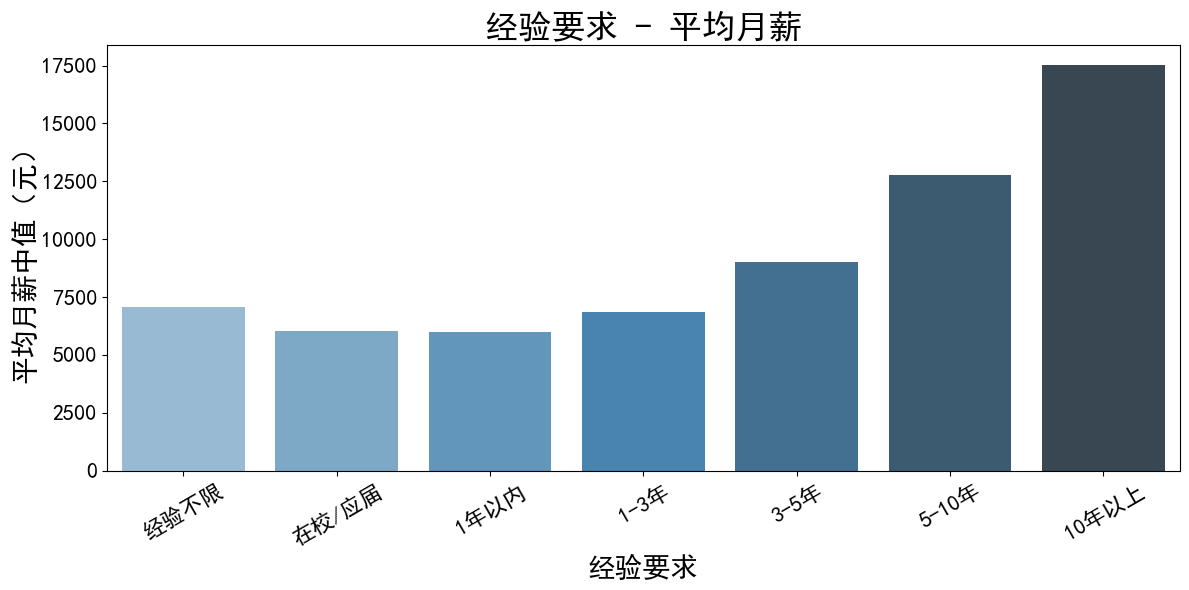

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.dropna(subset=['ÁªèÈ™åË¶ÅÊ±Ç'])

experience_order = [
    'ÁªèÈ™å‰∏çÈôê', 'Âú®Ê†°/Â∫îÂ±ä', '1Âπ¥‰ª•ÂÜÖ',
    '1-3Âπ¥', '3-5Âπ¥', '5-10Âπ¥', '10Âπ¥‰ª•‰∏ä'
]
grouped = df1.groupby('ÁªèÈ™åË¶ÅÊ±Ç')['ÊúàËñ™‰∏≠ÂÄº'].mean().reindex(experience_order)
# ÁªòÂà∂Êü±Áä∂Âõæ
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped.index, y=grouped.values, palette='Blues_d')

# Ê∑ªÂä†ÂõæË°®Ê†áÈ¢òÂíåËΩ¥Ê†áÁ≠æ
plt.title('ÁªèÈ™åË¶ÅÊ±Ç - Âπ≥ÂùáÊúàËñ™', fontsize=24)
plt.xlabel('ÁªèÈ™åË¶ÅÊ±Ç', fontsize=20)
plt.ylabel('Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄºÔºàÂÖÉÔºâ', fontsize=20)

# ÊóãËΩ¨xËΩ¥Ê†áÁ≠æ‰ª•Èò≤ÈáçÂè†
plt.xticks(rotation=30, fontsize=16)
plt.yticks(fontsize=16)

# ÊòæÁ§∫ÂõæË°®
plt.tight_layout()
plt.savefig("ÁªèÈ™åË¶ÅÊ±Ç_Âπ≥ÂùáÊúàËñ™.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

In [18]:
## ÂàÜÊûê‚ÄúÂ≠¶ÂéÜË¶ÅÊ±Ç‚ÄùÂíå‚ÄúËñ™ËµÑ‚ÄùÁöÑÁõ∏ÂÖ≥ÊÄß
## ÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞Ë°°Èáè‰∏§‰∏™ÂèòÈáèÁöÑÁ∫øÊÄßÁõ∏ÂÖ≥ÊÄßÔºåËåÉÂõ¥Âú® [-1, 1] ‰πãÈó¥Ôºö


# Âè™‰øùÁïôÈùûÁ©∫ÂÄº
df1 = df[['Â≠¶ÂéÜË¶ÅÊ±ÇÂàÜÁ±ª', 'ÊúàËñ™‰∏≠ÂÄº']].dropna()

# ËÆ°ÁÆóÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞
pearson_corr = df1['Â≠¶ÂéÜË¶ÅÊ±ÇÂàÜÁ±ª'].corr(df1['ÊúàËñ™‰∏≠ÂÄº'], method='pearson')
print(f'ÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞ÔºàÂ≠¶ÂéÜË¶ÅÊ±Ç vs Ëñ™ËµÑÔºâ: {pearson_corr:.4f}')

# Spearman Á≠âÁ∫ßÁõ∏ÂÖ≥ÊÄßÔºàÈÄÇÂêàÊéíÂ∫èÂèòÈáèÔºâ
spearman_corr = df1['Â≠¶ÂéÜË¶ÅÊ±ÇÂàÜÁ±ª'].corr(df1['ÊúàËñ™‰∏≠ÂÄº'], method='spearman')
print(f'Spearman Á≠âÁ∫ßÁõ∏ÂÖ≥Á≥ªÊï∞ÔºàÂ≠¶ÂéÜË¶ÅÊ±Ç vs Ëñ™ËµÑÔºâ: {spearman_corr:.4f}')

ÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞ÔºàÂ≠¶ÂéÜË¶ÅÊ±Ç vs Ëñ™ËµÑÔºâ: 0.0503
Spearman Á≠âÁ∫ßÁõ∏ÂÖ≥Á≥ªÊï∞ÔºàÂ≠¶ÂéÜË¶ÅÊ±Ç vs Ëñ™ËµÑÔºâ: 0.0832


C:\Users\21711\AppData\Local\Temp\ipykernel_6684\917518779.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Â≠¶ÂéÜË¶ÅÊ±Ç', y='ÊúàËñ™‰∏≠ÂÄº', data=df1, palette='Set2', showfliers=False)


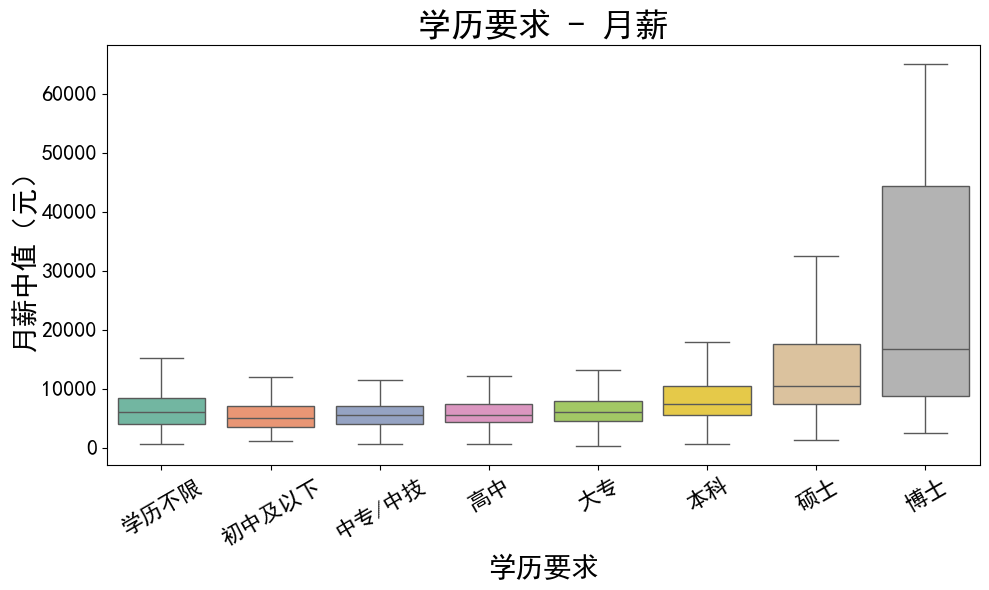

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Âà†Èô§ 'Â≠¶ÂéÜË¶ÅÊ±Ç' ‰∏∫Á©∫ÁöÑËÆ∞ÂΩïÔºåÂπ∂Â§çÂà∂‰∏∫ df1
df1 = df.dropna(subset=['Â≠¶ÂéÜË¶ÅÊ±Ç'])

# 2. Ëá™ÂÆö‰πâÂ≠¶ÂéÜË¶ÅÊ±ÇÁöÑÈ°∫Â∫è
education_order = ['Â≠¶ÂéÜ‰∏çÈôê', 'Âàù‰∏≠Âèä‰ª•‰∏ã', '‰∏≠‰∏ì/‰∏≠ÊäÄ', 'È´ò‰∏≠', 'Â§ß‰∏ì', 'Êú¨Áßë', 'Á°ïÂ£´', 'ÂçöÂ£´']

# 3. Â∞ÜÂ≠¶ÂéÜË¶ÅÊ±ÇÂàóËΩ¨Êç¢‰∏∫ÊúâÂ∫èÁöÑÁ±ªÂà´Á±ªÂûãÔºåÁ°Æ‰øùÊåâÁÖßÈ°∫Â∫èÊéíÂ∫è
df1['Â≠¶ÂéÜË¶ÅÊ±Ç'] = pd.Categorical(df1['Â≠¶ÂéÜË¶ÅÊ±Ç'], categories=education_order, ordered=True)

# 4. ÁªòÂà∂Â≠¶ÂéÜË¶ÅÊ±Ç‰∏éÊúàËñ™‰∏≠ÂÄºÁöÑÁÆ±Á∫øÂõæ
plt.figure(figsize=(10, 6))
sns.boxplot(x='Â≠¶ÂéÜË¶ÅÊ±Ç', y='ÊúàËñ™‰∏≠ÂÄº', data=df1, palette='Set2', showfliers=False)

# 5. ËÆæÁΩÆÂõæË°®Ê†áÈ¢òÂíåÊ†áÁ≠æ
plt.title('Â≠¶ÂéÜË¶ÅÊ±Ç - ÊúàËñ™', fontsize=24)
plt.xlabel('Â≠¶ÂéÜË¶ÅÊ±Ç', fontsize=20)
plt.ylabel('ÊúàËñ™‰∏≠ÂÄºÔºàÂÖÉÔºâ', fontsize=20)

# 6. ÊòæÁ§∫ÂõæË°®
plt.xticks(rotation=30, fontsize=16)  # ‰Ωø x ËΩ¥Ê†áÁ≠æÊõ¥Âä†Ê∏ÖÊô∞
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig("Â≠¶ÂéÜË¶ÅÊ±Ç - ÊúàËñ™.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

# 7. ËÆ°ÁÆóÂ≠¶ÂéÜË¶ÅÊ±Ç‰∏éÊúàËñ™‰∏≠ÂÄºÁöÑ‰∏≠‰ΩçÊï∞
#correlation = df1.groupby('Â≠¶ÂéÜË¶ÅÊ±Ç')['ÊúàËñ™‰∏≠ÂÄº'].median()

# ËæìÂá∫ÂêÑÂ≠¶ÂéÜË¶ÅÊ±ÇÂØπÂ∫îÁöÑËñ™ËµÑ‰∏≠‰ΩçÊï∞
#formatted_correlation = correlation.apply(lambda x: f'{x:,.0f}ÂÖÉ')
#print(f"ÂêÑÂ≠¶ÂéÜË¶ÅÊ±ÇÂØπÂ∫îÁöÑËñ™ËµÑ‰∏≠‰ΩçÊï∞Ôºö\n{formatted_correlation}")

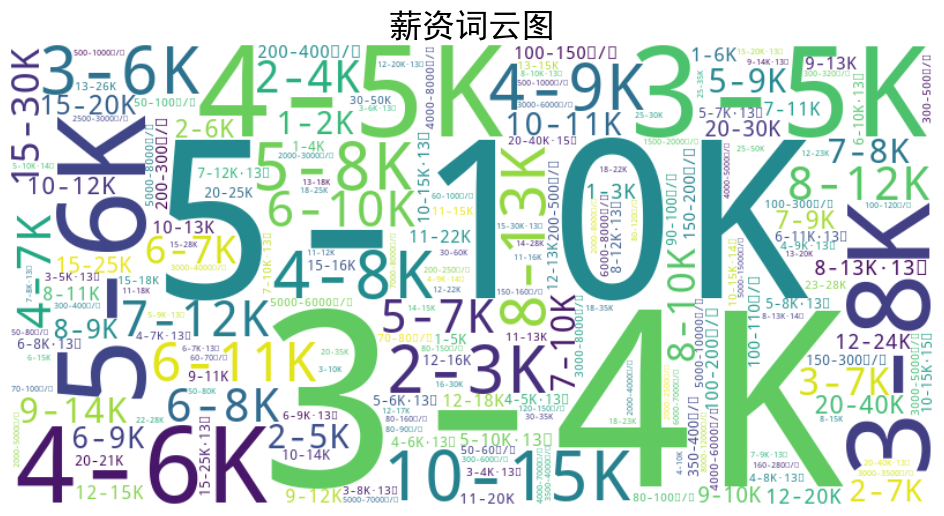

In [20]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# 1. Ê∏ÖÁêÜÂπ∂ÁªüËÆ°È¢ëÊï∞
df1 = df['Ëñ™ËµÑ'].dropna().astype(str).value_counts().to_dict()

# 2. ÁîüÊàêËØç‰∫ëÔºà‰ΩøÁî®È¢ëÁéáÔºå‰∏çËøõË°åÂàÜËØçÔºâ
wordcloud = WordCloud(
    #font_path='msyh.ttc',  # ‰∏≠ÊñáÂ≠ó‰Ωì
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(df1)

# 3. ÊòæÁ§∫ËØç‰∫ë
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ëñ™ËµÑËØç‰∫ëÂõæ', fontsize=24)
plt.savefig("Ëñ™ËµÑËØç‰∫ëÂõæ.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

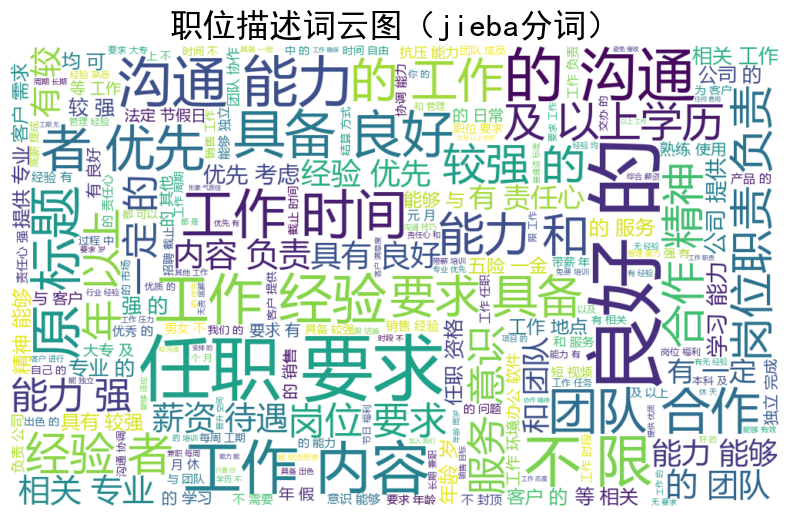

In [24]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. ÂêàÂπ∂ÊâÄÊúâËÅå‰ΩçÊèèËø∞‰∏∫‰∏Ä‰∏™ÈïøÊñáÊú¨
text = ' '.join(df['ËÅå‰ΩçÊèèËø∞'].dropna().astype(str))

# 2. ‰ΩøÁî® jieba ÂàÜËØç
words = jieba.cut(text)
cut_text = ' '.join(words)  # WordCloud ÈúÄË¶ÅÁî®Á©∫Ê†ºÂàÜÂºÄÁöÑÂ≠óÁ¨¶‰∏≤

# 3. ÂàõÂª∫ËØç‰∫ëÂØπË±°
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/msyh.ttc',  # ÊåáÂÆö‰∏≠ÊñáÂ≠ó‰ΩìË∑ØÂæÑÔºåÊ†πÊçÆÂÆûÈôÖÊÉÖÂÜµ‰øÆÊîπ
    width=1000,
    height=600,
    background_color='white',
    max_words=200,          # ÊòæÁ§∫ÁöÑËØçËØ≠Êï∞Èáè
    max_font_size=100,      # ÊúÄÂ§ßÂ≠ó‰ΩìÂ§ßÂ∞è
).generate(cut_text)

# 4. ÊòæÁ§∫ËØç‰∫ë
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('ËÅå‰ΩçÊèèËø∞ËØç‰∫ëÂõæÔºàjiebaÂàÜËØçÔºâ', fontsize=24)
plt.savefig("ËÅå‰ΩçÊèèËø∞ËØç‰∫ëÂõæÔºàjiebaÂàÜËØçÔºâ.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

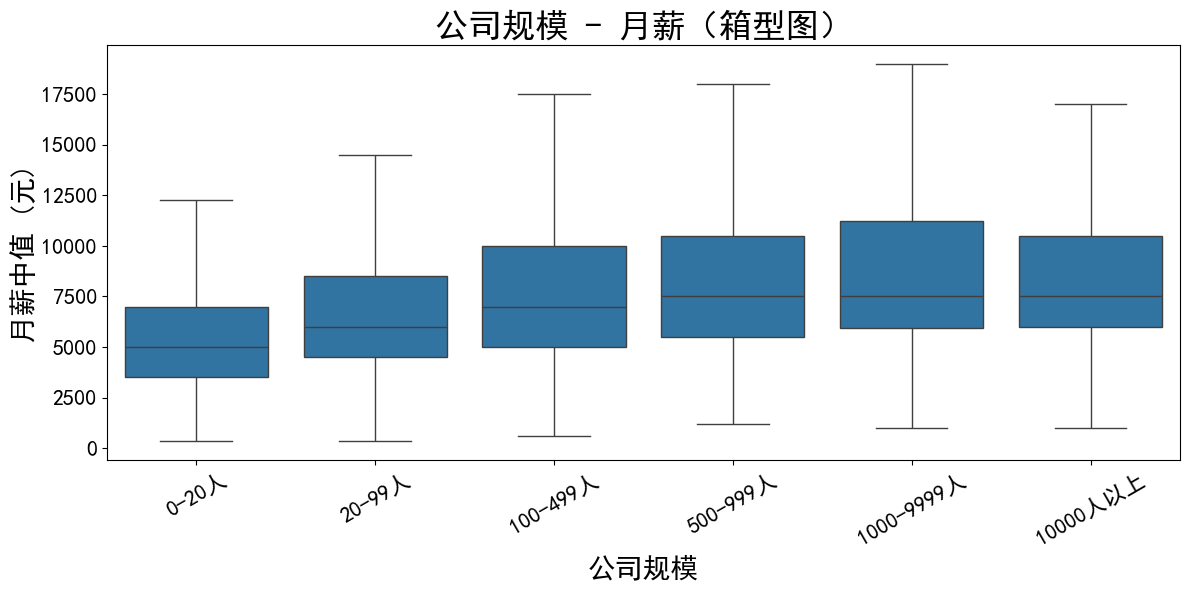

In [23]:
import seaborn as sns

order = ['0-20‰∫∫', '20-99‰∫∫', '100-499‰∫∫', '500-999‰∫∫', '1000-9999‰∫∫', '10000‰∫∫‰ª•‰∏ä']

# ÁªòÂà∂ÁÆ±ÂûãÂõæ
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ÂÖ¨Âè∏ËßÑÊ®°', y='ÊúàËñ™‰∏≠ÂÄº', order=order, showfliers=False)

plt.title('ÂÖ¨Âè∏ËßÑÊ®° - ÊúàËñ™ÔºàÁÆ±ÂûãÂõæÔºâ', fontsize=24)
plt.xlabel('ÂÖ¨Âè∏ËßÑÊ®°', fontsize=20)
plt.ylabel('ÊúàËñ™‰∏≠ÂÄº (ÂÖÉ)', fontsize=20)
plt.xticks(rotation=30, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig("ÂÖ¨Âè∏ËßÑÊ®° - ÊúàËñ™ÔºàÁÆ±ÂûãÂõæÔºâ.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

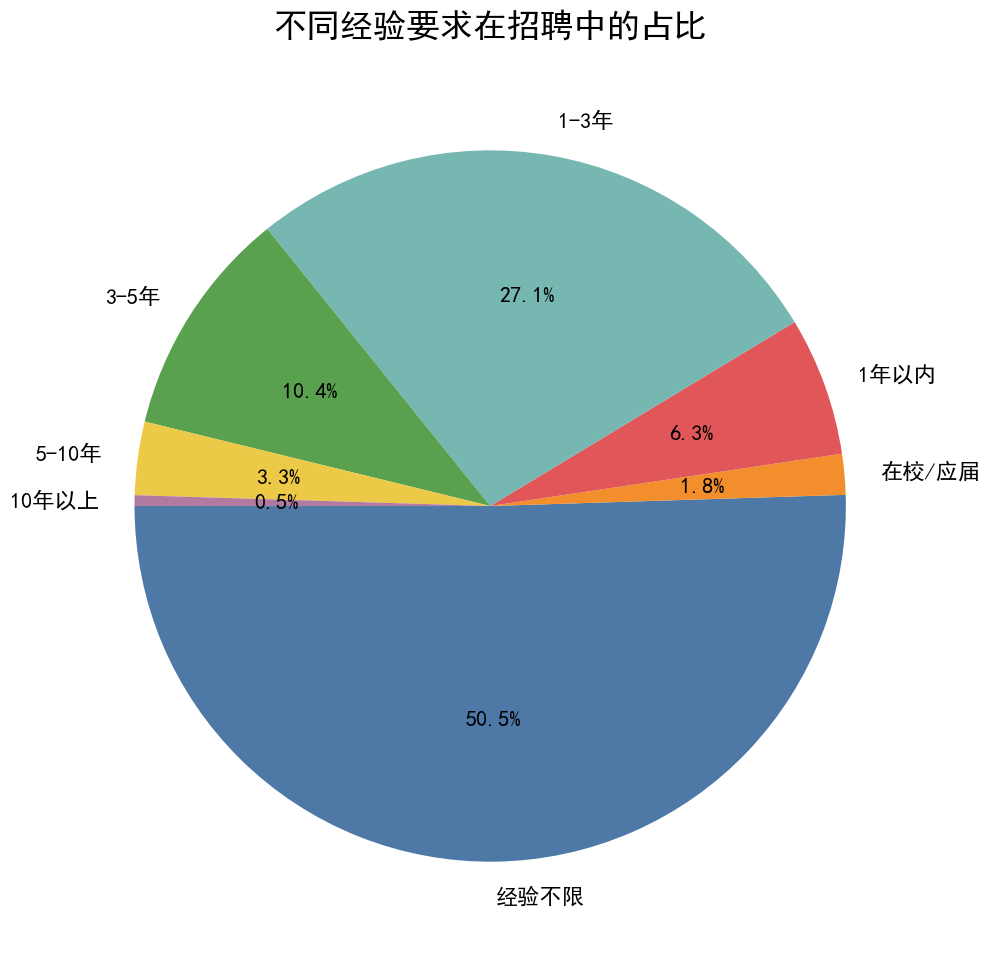

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# ‰øùÁïôÈúÄË¶ÅÁöÑ7‰∏™ÂàÜÁ±ª
valid_exps = [
    'ÁªèÈ™å‰∏çÈôê',
    'Âú®Ê†°/Â∫îÂ±ä',
    '1Âπ¥‰ª•ÂÜÖ',
    '1-3Âπ¥',
    '3-5Âπ¥',
    '5-10Âπ¥',
    '10Âπ¥‰ª•‰∏ä'
]
df = df[df['ÁªèÈ™åË¶ÅÊ±Ç'].isin(valid_exps)]

# ÁªüËÆ° & ËÆ°ÁÆóÂç†ÊØî
exp_counts = df['ÁªèÈ™åË¶ÅÊ±Ç'].value_counts().reindex(valid_exps)
exp_percent = exp_counts / exp_counts.sum()

# Ëá™ÂÆö‰πâÈÖçËâ≤
colors = [
    '#4E79A7', '#F28E2B', '#E15759',
    '#76B7B2', '#59A14F', '#EDC948', '#B07AA1'
]

# ÁªòÂõæ
plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(
    exp_percent,
    labels=exp_percent.index,
    autopct='%1.1f%%',
    startangle=180,
    colors=colors,
    textprops={'fontsize': 16},
    labeldistance=1.1,  # Ë∞ÉÊï¥Â§ñÈÉ®Ê†áÁ≠æË∑ùÁ¶ªÂúÜÂøÉÁöÑË∑ùÁ¶ª
    pctdistance=0.6    # Ë∞ÉÊï¥ÁôæÂàÜÊØîÊñáÊú¨Ë∑ùÁ¶ªÂúÜÂøÉÁöÑË∑ùÁ¶ª
)
plt.title('‰∏çÂêåÁªèÈ™åË¶ÅÊ±ÇÂú®ÊãõËÅò‰∏≠ÁöÑÂç†ÊØî', fontsize=24)
plt.axis('equal')
plt.tight_layout()
plt.savefig("‰∏çÂêåÁªèÈ™åË¶ÅÊ±ÇÂú®ÊãõËÅò‰∏≠ÁöÑÂç†ÊØî.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

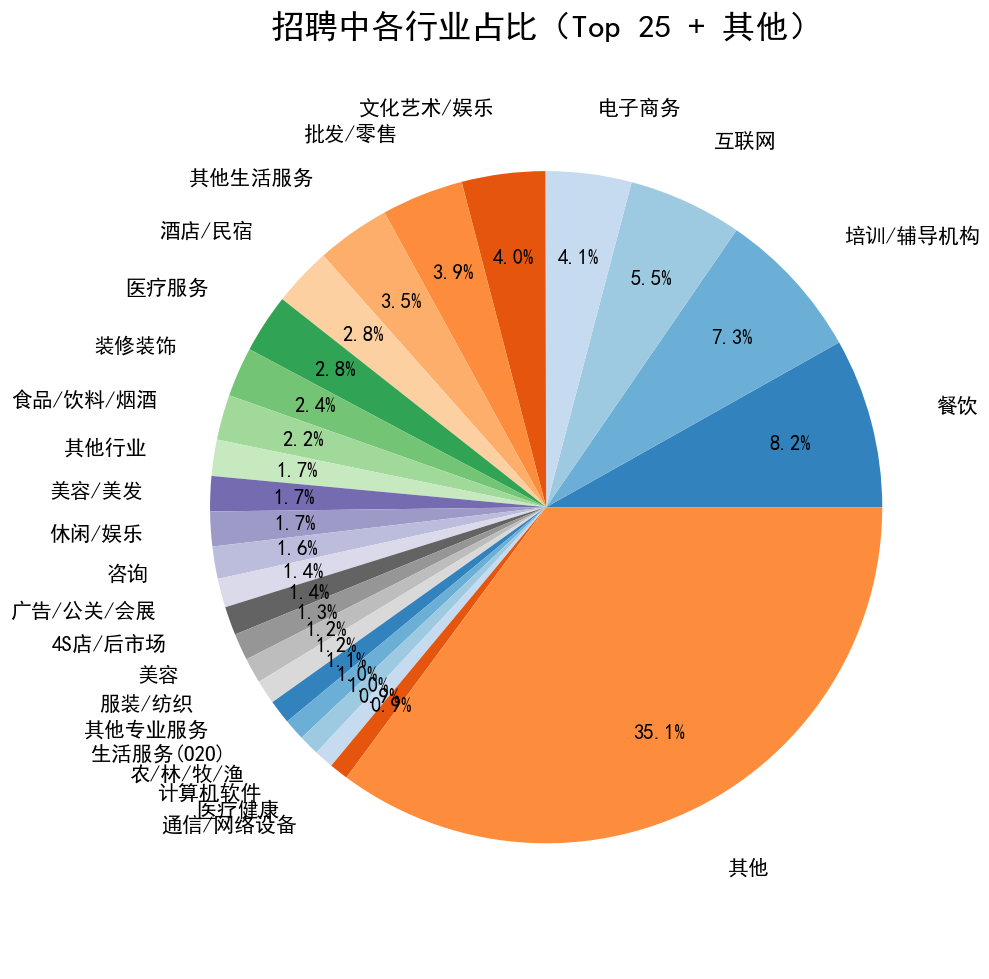

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. ÁªüËÆ°Ë°å‰∏öÂá∫Áé∞Ê¨°Êï∞
industry_counts = df['ÂÖ¨Âè∏Ë°å‰∏ö'].value_counts()

# 2. Ëé∑ÂèñÂâç30ÁöÑË°å‰∏ö
top30 = industry_counts[:25]

# 3. ËÆ°ÁÆó‚ÄúÂÖ∂‰ªñ‚ÄùÁöÑÊï∞Èáè
other = industry_counts[25:].sum()

# 4. ÂêàÂπ∂Ââç30Âíå‚ÄúÂÖ∂‰ªñ‚Äù
industry_final = pd.concat([top30, pd.Series({'ÂÖ∂‰ªñ': other})])

# 5. ËÆ°ÁÆóÂç†ÊØî
industry_percent = industry_final / industry_final.sum()

# 6. ‰ΩøÁî® tab20c ÈÖçËâ≤
colors = plt.cm.tab20c.colors[:len(industry_percent)]

# 7. ÁªòÂà∂È•ºÂõæ
plt.figure(figsize=(10, 10))
plt.pie(
    industry_percent,
    labels=industry_percent.index,
    autopct='%1.1f%%',
    startangle=0,
    colors=colors,
    textprops={'fontsize': 15},
    labeldistance=1.2,  # Ë∞ÉÊï¥Â§ñÈÉ®Ê†áÁ≠æË∑ùÁ¶ªÂúÜÂøÉÁöÑË∑ùÁ¶ª
    pctdistance=0.75
)
plt.title('ÊãõËÅò‰∏≠ÂêÑË°å‰∏öÂç†ÊØîÔºàTop 25 + ÂÖ∂‰ªñÔºâ', fontsize=24)
plt.axis('equal')
plt.tight_layout()
plt.savefig("ÊãõËÅò‰∏≠ÂêÑË°å‰∏öÂç†ÊØîÔºàTop 25 + ÂÖ∂‰ªñÔºâ.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3993364600.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_salary_median_top30.index, y=industry_salary_median_top30.values, palette='viridis')


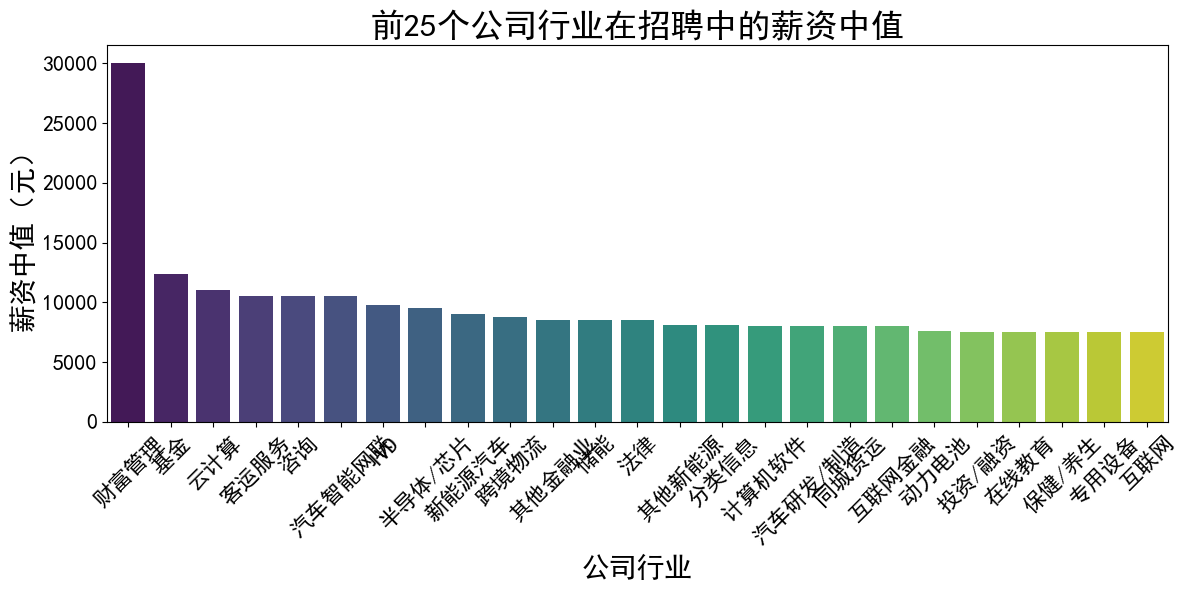

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ÂÅáËÆæ‰Ω†ÁöÑDataFrame‰∏∫ dfÔºå‰∏îÊúâ‚ÄúÂÖ¨Âè∏Ë°å‰∏ö‚ÄùÂíå‚ÄúËñ™ËµÑ‰∏≠ÂÄº‚ÄùÂàó
# Â¶ÇÊûú‚ÄúËñ™ËµÑ‰∏≠ÂÄº‚ÄùÂàóÂåÖÂê´ËåÉÂõ¥ÂÄºÔºåÈúÄË¶ÅÂÖàËøõË°åÂ§ÑÁêÜÔºåÂ¶Ç‰∏ä‰∏Ä‰∏™Á§∫‰æã‰∏≠ÁöÑÊñπÊ≥ï

# 1. ÊåâÂÖ¨Âè∏Ë°å‰∏öÂàÜÁªÑÔºåËÆ°ÁÆóËñ™ËµÑ‰∏≠ÂÄº
industry_salary_median = df.groupby('ÂÖ¨Âè∏Ë°å‰∏ö')['ÊúàËñ™‰∏≠ÂÄº'].median().sort_values(ascending=False)

# 2. Âè™ÈÄâÊã©Ââç30‰∏™Ë°å‰∏ö
industry_salary_median_top30 = industry_salary_median.head(25)

# 3. ÁªòÂà∂Êü±Áä∂Âõæ
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_salary_median_top30.index, y=industry_salary_median_top30.values, palette='viridis')

# 4. Ê∑ªÂä†Ê†áÈ¢òÂíåÊ†áÁ≠æ
plt.xticks(rotation=45, fontsize=16)  # Â¶ÇÊûúË°å‰∏öÂêçÁß∞ËæÉÈïøÔºåÂèØ‰ª•ÊóãËΩ¨xËΩ¥Ê†áÁ≠æ
plt.yticks(fontsize=16)
plt.xlabel('ÂÖ¨Âè∏Ë°å‰∏ö', fontsize=20)
plt.ylabel('Ëñ™ËµÑ‰∏≠ÂÄºÔºàÂÖÉÔºâ', fontsize=20)
plt.title('Ââç25‰∏™ÂÖ¨Âè∏Ë°å‰∏öÂú®ÊãõËÅò‰∏≠ÁöÑËñ™ËµÑ‰∏≠ÂÄº', fontsize=24)
plt.tight_layout()
plt.savefig("Ââç25‰∏™ÂÖ¨Âè∏Ë°å‰∏öÂú®ÊãõËÅò‰∏≠ÁöÑËñ™ËµÑ‰∏≠ÂÄº.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

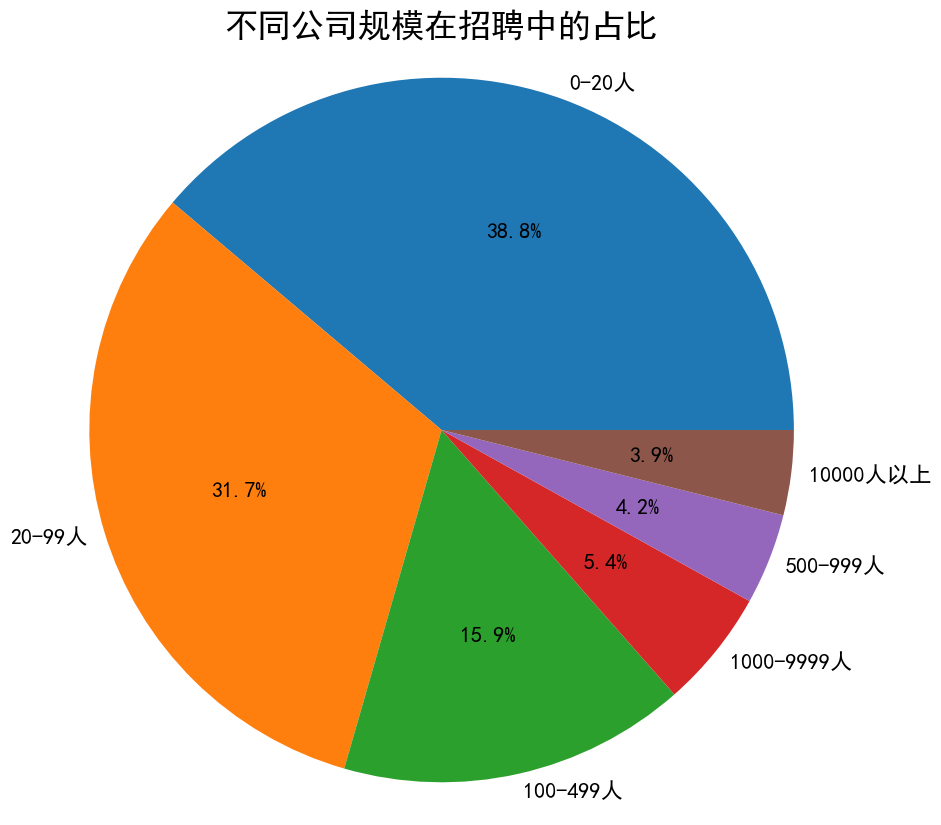

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. ÁªüËÆ°ÂêÑÂÖ¨Âè∏ËßÑÊ®°ÁöÑÊï∞Èáè
company_size_counts = df['ÂÖ¨Âè∏ËßÑÊ®°'].value_counts()

# 2. ËÆ°ÁÆóÂêÑÂÖ¨Âè∏ËßÑÊ®°ÁöÑÂç†ÊØî
company_size_percent = company_size_counts / company_size_counts.sum()

# 3. ÁªòÂà∂È•ºÂõæ
plt.figure(figsize=(10, 10))
plt.pie(company_size_percent, 
        labels=company_size_percent.index, 
        autopct='%1.1f%%', 
        startangle=0, 
        textprops={'fontsize': 16},
        labeldistance=1.05)  # Ë∞ÉÊï¥Â§ñÈÉ®Ê†áÁ≠æË∑ùÁ¶ªÂúÜÂøÉÁöÑË∑ùÁ¶ª
plt.title('‰∏çÂêåÂÖ¨Âè∏ËßÑÊ®°Âú®ÊãõËÅò‰∏≠ÁöÑÂç†ÊØî', fontsize=24)
plt.axis('equal')  # ‰øùËØÅÊòØÂúÜÂΩ¢
plt.savefig("‰∏çÂêåÂÖ¨Âè∏ËßÑÊ®°Âú®ÊãõËÅò‰∏≠ÁöÑÂç†ÊØî.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

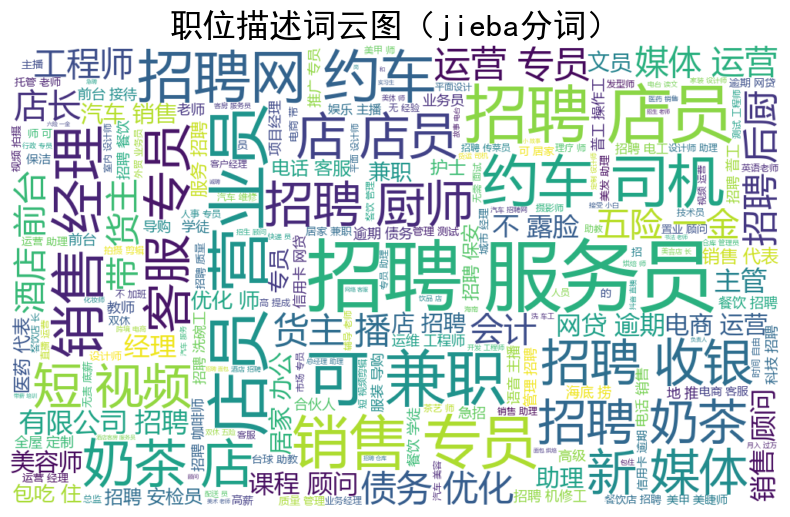

In [29]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. ÂêàÂπ∂ÊâÄÊúâËÅå‰ΩçÊèèËø∞‰∏∫‰∏Ä‰∏™ÈïøÊñáÊú¨
text = ' '.join(df['ËÅå‰ΩçÂêçÁß∞'].dropna().astype(str))

# 2. ‰ΩøÁî® jieba ÂàÜËØç
words = jieba.cut(text)
cut_text = ' '.join(words)  # WordCloud ÈúÄË¶ÅÁî®Á©∫Ê†ºÂàÜÂºÄÁöÑÂ≠óÁ¨¶‰∏≤

# 3. ÂàõÂª∫ËØç‰∫ëÂØπË±°
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/msyh.ttc',  # ‰∏≠ÊñáÂ≠ó‰ΩìË∑ØÂæÑÔºàWindows‰∏ÄËà¨ÊòØÂæÆËΩØÈõÖÈªëÔºâ
    width=1000,
    height=600,
    background_color='white',
    max_words=200,          # ÊòæÁ§∫ÁöÑËØçËØ≠Êï∞Èáè
    max_font_size=100       # ÊúÄÂ§ßÂ≠ó‰ΩìÂ§ßÂ∞è
).generate(cut_text)

# 4. ÊòæÁ§∫ËØç‰∫ë
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('ËÅå‰ΩçÊèèËø∞ËØç‰∫ëÂõæÔºàjiebaÂàÜËØçÔºâ', fontsize=24)
plt.savefig("ËÅå‰ΩçÊèèËø∞ËØç‰∫ëÂõæÔºàjiebaÂàÜËØçÔºâ.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

In [30]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts

# 1. ÂüéÂ∏ÇÂà∞ÁúÅ‰ªΩÁöÑÊò†Â∞ÑË°®ÔºàÁ§∫‰æãÔºåÈúÄÊ†πÊçÆ‰Ω†Êï∞ÊçÆÂÆûÈôÖÊÉÖÂÜµË°•ÂÖÖÂÆåÊï¥Ôºâ
city_to_province = {
    'Âåó‰∫¨': 'Âåó‰∫¨Â∏Ç', '‰∏äÊµ∑': '‰∏äÊµ∑Â∏Ç', 'ÂπøÂ∑û': 'Âπø‰∏úÁúÅ', 'Ê∑±Âú≥': 'Âπø‰∏úÁúÅ', 'Êù≠Â∑û': 'ÊµôÊ±üÁúÅ',
    'Âçó‰∫¨': 'Ê±üËãèÁúÅ', 'Ê≠¶Ê±â': 'ÊπñÂåóÁúÅ', 'ÊàêÈÉΩ': 'ÂõõÂ∑ùÁúÅ', 'ÈáçÂ∫Ü': 'ÈáçÂ∫ÜÂ∏Ç', 'Â§©Ê¥•': 'Â§©Ê¥•Â∏Ç',
    # ÂèØÁªßÁª≠Ë°•ÂÖÖÂÖ∂ÂÆÉÂüéÂ∏ÇÊò†Â∞Ñ...
}

# 2. Êò†Â∞Ñ‚ÄúÂèëÂ∏ÉÂüéÂ∏Ç‚ÄùÂà∞ÁúÅ‰ªΩ
df['ÁúÅ‰ªΩ'] = df['ÂèëÂ∏ÉÂüéÂ∏Ç'].map(city_to_province)

# 3. Âà†Èô§Êò†Â∞ÑÂ§±Ë¥•ÁöÑÂüéÂ∏ÇÔºàÂç≥ÁúÅ‰ªΩ‰∏∫Á©∫ÁöÑÔºâ
df_map = df.dropna(subset=['ÁúÅ‰ªΩ'])

# 4. ËÆ°ÁÆóÊØè‰∏™ÁúÅ‰ªΩÁöÑÂπ≥ÂùáËñ™ËµÑ
province_salary = df_map.groupby('ÁúÅ‰ªΩ')['ÊúàËñ™‰∏≠ÂÄº'].mean().round(0)

# 5. ÂáÜÂ§áÂú∞ÂõæÊï∞ÊçÆ
map_data = list(zip(province_salary.index.tolist(), province_salary.values.tolist()))

# 6. ÁªòÂà∂‰∏≠ÂõΩÂú∞ÂõæÁÉ≠ÂäõÂõæ
map_chart = (
    Map()
    .add("Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº", map_data, "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="ÂêÑÁúÅÂπ≥ÂùáÊúàËñ™‰∏≠ÂÄºÁÉ≠ÂäõÂõæ"),
        visualmap_opts=opts.VisualMapOpts(
            min_=province_salary.min(),
            max_=province_salary.max(),
            is_piecewise=True,
            pieces=[
                {"min": 40000, "label": ">40000", "color": "#7f1100"},
                {"min": 30000, "max": 40000, "label": "30k-40k", "color": "#ff5428"},
                {"min": 20000, "max": 30000, "label": "20k-30k", "color": "#ff8c71"},
                {"min": 10000, "max": 20000, "label": "10k-20k", "color": "#ffd768"},
                {"min": 0, "max": 10000, "label": "<10k", "color": "#90ee90"},
            ]
        )
    )
)

# 7. Ê∏≤ÊüìËæìÂá∫ÔºàJupyter ÂÜÖÂèØÁî®Ôºâ
map_chart.render_notebook()

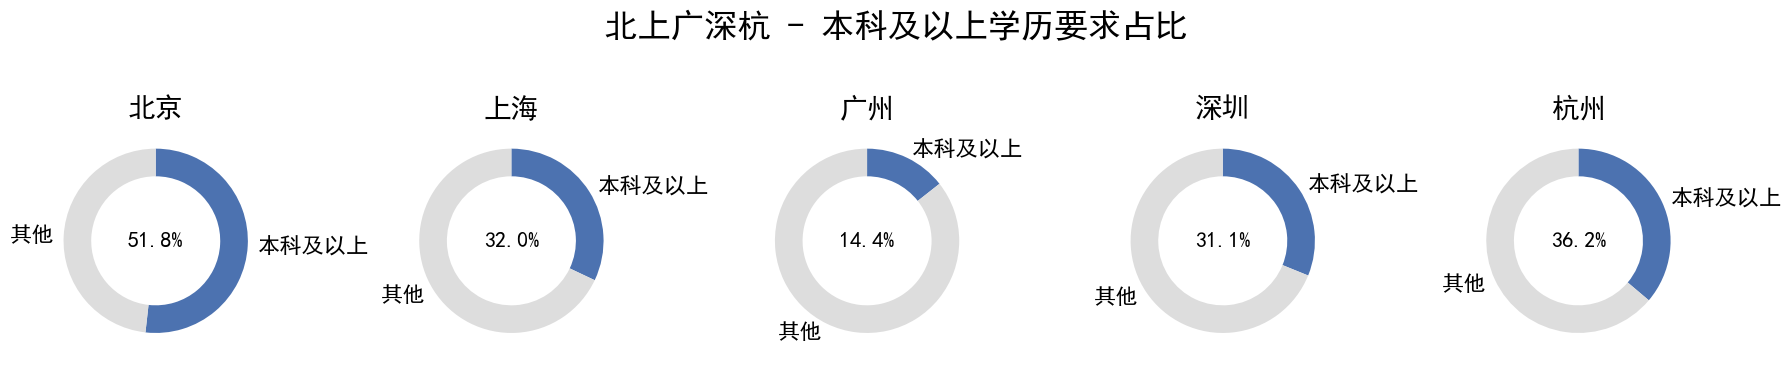

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# ÈáçÁÇπÂüéÂ∏Ç
cities = ['Âåó‰∫¨', '‰∏äÊµ∑', 'ÂπøÂ∑û', 'Ê∑±Âú≥', 'Êù≠Â∑û']
target_degrees = ['Êú¨Áßë', 'Á°ïÂ£´', 'ÂçöÂ£´']

# ËÆæÁΩÆÁîªÂ∏É
fig, axes = plt.subplots(1, len(cities), figsize=(18, 4))

for i, city in enumerate(cities):
    city_df = df[df['ÂèëÂ∏ÉÂüéÂ∏Ç'] == city]
    total = len(city_df)
    
    # Êú¨ÁßëÂèä‰ª•‰∏ä
    count_bk = city_df['Â≠¶ÂéÜË¶ÅÊ±Ç'].isin(target_degrees).sum()
    percent_bk = count_bk / total * 100
    
    # È•ºÂõæÊï∞ÊçÆ
    sizes = [percent_bk, 100 - percent_bk]
    labels = ['Êú¨ÁßëÂèä‰ª•‰∏ä', 'ÂÖ∂‰ªñ']
    colors = ['#4C72B0', '#DDDDDD']
    
    # ÁîªÂõæ
    wedges, texts, autotexts = axes[i].pie(
        sizes,
        labels=labels,
        colors=colors,
        startangle=90,
        counterclock=False,
        wedgeprops={'width': 0.3},
        autopct='',
        textprops={'fontsize': 16}
    )
    
    # Ê∑ªÂä†‰∏≠Èó¥ÊñáÂ≠ó
    axes[i].text(0, 0, f"{percent_bk:.1f}%", ha='center', va='center', fontsize=16, fontweight='bold')
    axes[i].set_title(city, fontsize=20)

# ÊÄª‰ΩìÂ∏ÉÂ±Ä
plt.suptitle("Âåó‰∏äÂπøÊ∑±Êù≠ - Êú¨ÁßëÂèä‰ª•‰∏äÂ≠¶ÂéÜË¶ÅÊ±ÇÂç†ÊØî", fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.92])
#plt.title('Âåó‰∏äÂπøÊ∑±Êù≠ Êú¨ÁßëÂèä‰ª•‰∏äÂ≠¶ÂéÜË¶ÅÊ±Ç Âç†ÊØî', fontsize=24)
plt.savefig("Âåó‰∏äÂπøÊ∑±Êù≠ - Êú¨ÁßëÂèä‰ª•‰∏äÂ≠¶ÂéÜË¶ÅÊ±ÇÂç†ÊØî.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

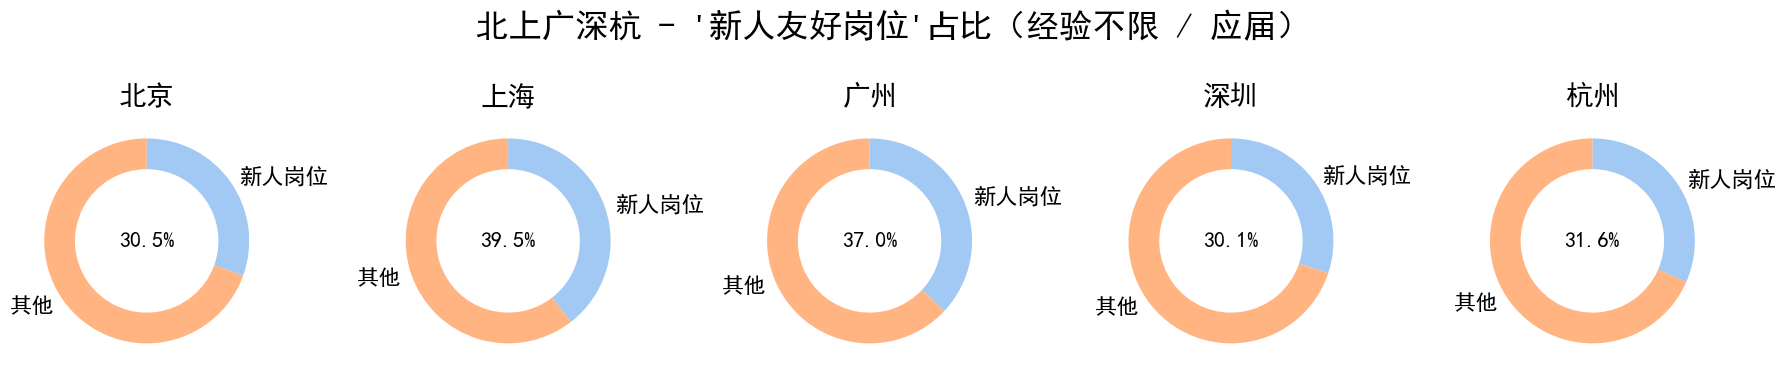

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ÂüéÂ∏ÇÂàóË°®
cities = ['Âåó‰∫¨', '‰∏äÊµ∑', 'ÂπøÂ∑û', 'Ê∑±Âú≥', 'Êù≠Â∑û']
colors = sns.color_palette("pastel")

# ÂàõÂª∫ÂõæË°®
fig, axes = plt.subplots(1, len(cities), figsize=(18, 4))

# Êñ∞‰∫∫ÂÆö‰πâ
newbie_keywords = ['ÁªèÈ™å‰∏çÈôê', 'Âú®Ê†°/Â∫îÂ±ä']

for i, city in enumerate(cities):
    city_df = df[df['ÂèëÂ∏ÉÂüéÂ∏Ç'] == city]
    total = len(city_df)
    count = city_df['ÁªèÈ™åË¶ÅÊ±Ç'].isin(newbie_keywords).sum()
    percent = count / total * 100 if total > 0 else 0  # ÈÅøÂÖçÈô§0
    
    # È•ºÂõæÊï∞ÊçÆ
    values = [percent, 100 - percent]
    labels = ['Êñ∞‰∫∫Â≤ó‰Ωç', 'ÂÖ∂‰ªñ']
    
    wedges, texts, autotexts = axes[i].pie(
        values,
        labels=labels,
        colors=colors,
        startangle=90,
        counterclock=False,
        wedgeprops={'width': 0.3},
        autopct='',
        textprops={'fontsize': 16}
    )
    
    # ‰∏≠ÂøÉÁôæÂàÜÊØîÊñáÂ≠ó
    axes[i].text(0, 0, f"{percent:.1f}%", ha='center', va='center', fontsize=16, fontweight='bold')
    axes[i].set_title(city, fontsize=20)

plt.suptitle("Âåó‰∏äÂπøÊ∑±Êù≠ - 'Êñ∞‰∫∫ÂèãÂ•ΩÂ≤ó‰Ωç'Âç†ÊØîÔºàÁªèÈ™å‰∏çÈôê / Â∫îÂ±äÔºâ", fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig("Êñ∞‰∫∫ÂèãÂ•ΩÂ≤ó‰ΩçÂç†ÊØî.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

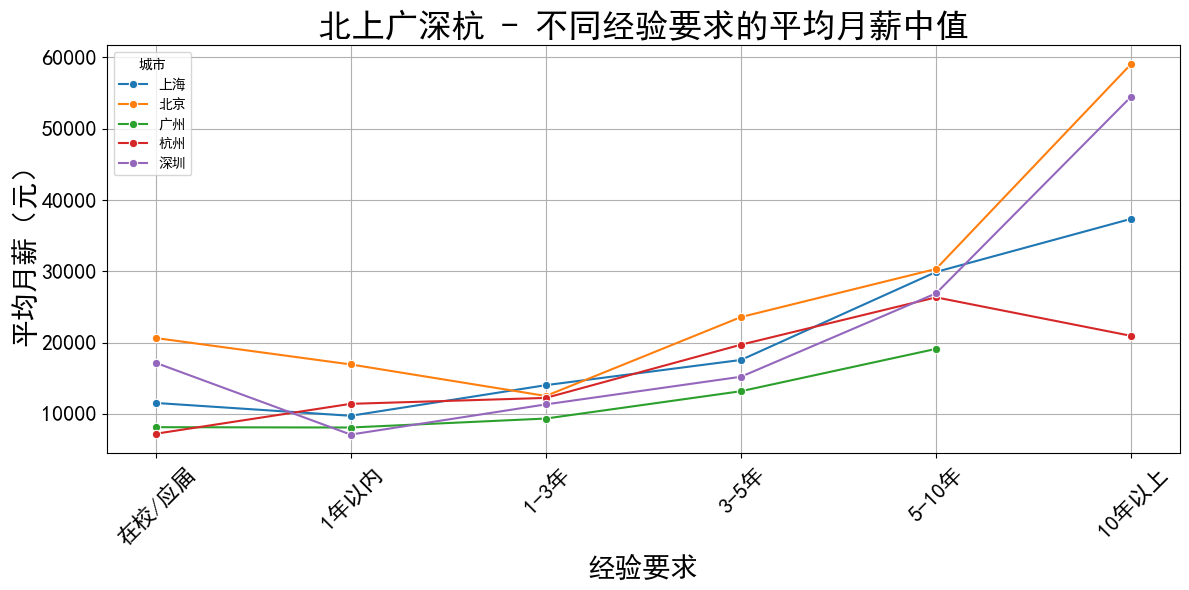

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm



# Ê†áÂáÜÁªèÈ™åÈ°∫Â∫è
experience_order = ['Âú®Ê†°/Â∫îÂ±ä', '1Âπ¥‰ª•ÂÜÖ', '1-3Âπ¥', '3-5Âπ¥', '5-10Âπ¥', '10Âπ¥‰ª•‰∏ä']

# ÈáçÁÇπÂüéÂ∏Ç
cities = ['Âåó‰∫¨', '‰∏äÊµ∑', 'ÂπøÂ∑û', 'Ê∑±Âú≥', 'Êù≠Â∑û']

# Á≠õÈÄâ
df_filtered = df[df['ÂèëÂ∏ÉÂüéÂ∏Ç'].isin(cities) & df['ÁªèÈ™åË¶ÅÊ±Ç'].isin(experience_order)]

# ÂàÜÁªÑÂèñÂπ≥ÂùáËñ™ËµÑ
grouped = df_filtered.groupby(['ÂèëÂ∏ÉÂüéÂ∏Ç', 'ÁªèÈ™åË¶ÅÊ±Ç'])['ÊúàËñ™‰∏≠ÂÄº'].mean().reset_index()

# ÊéíÂ∫èÁªèÈ™åÁ≠âÁ∫ß
grouped['ÁªèÈ™åË¶ÅÊ±Ç'] = pd.Categorical(grouped['ÁªèÈ™åË¶ÅÊ±Ç'], categories=experience_order, ordered=True)
grouped = grouped.sort_values(['ÂèëÂ∏ÉÂüéÂ∏Ç', 'ÁªèÈ™åË¶ÅÊ±Ç'])

# ÁªòÂõæ
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='ÁªèÈ™åË¶ÅÊ±Ç', y='ÊúàËñ™‰∏≠ÂÄº', hue='ÂèëÂ∏ÉÂüéÂ∏Ç', marker='o', palette='tab10')

plt.title("Âåó‰∏äÂπøÊ∑±Êù≠ - ‰∏çÂêåÁªèÈ™åË¶ÅÊ±ÇÁöÑÂπ≥ÂùáÊúàËñ™‰∏≠ÂÄº", fontsize=24)
plt.xticks(rotation=45, fontsize=16)  # Â¶ÇÊûúË°å‰∏öÂêçÁß∞ËæÉÈïøÔºåÂèØ‰ª•ÊóãËΩ¨xËΩ¥Ê†áÁ≠æ
plt.yticks(fontsize=16)
plt.xlabel("ÁªèÈ™åË¶ÅÊ±Ç", fontsize=20)
plt.ylabel("Âπ≥ÂùáÊúàËñ™ÔºàÂÖÉÔºâ", fontsize=20)
plt.grid(True)
plt.legend(title="ÂüéÂ∏Ç")
plt.tight_layout()
plt.savefig("Âåó‰∏äÂπøÊ∑±Êù≠ - ‰∏çÂêåÁªèÈ™åË¶ÅÊ±ÇÁöÑÂπ≥ÂùáÊúàËñ™‰∏≠ÂÄº.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

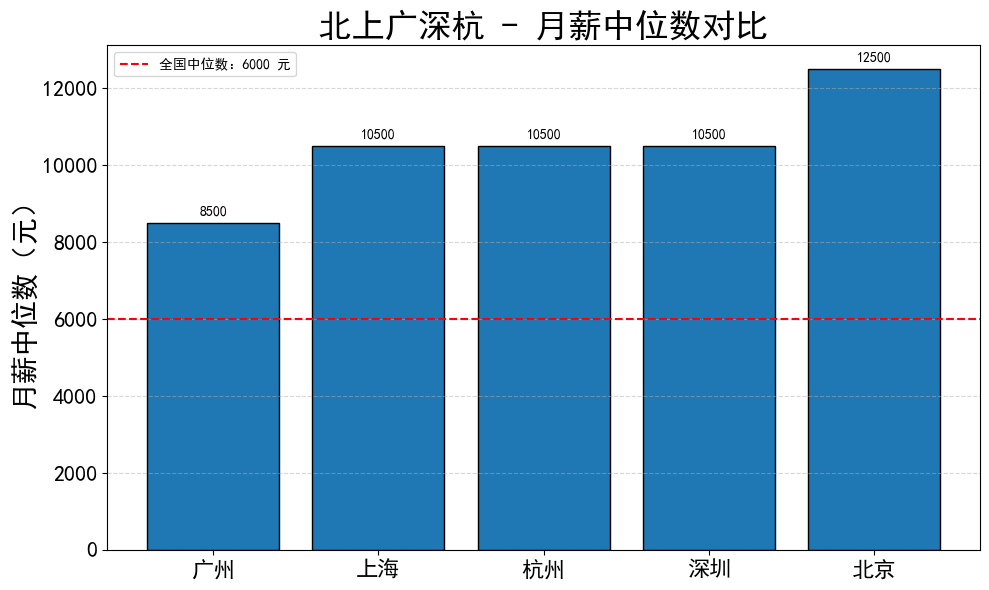

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# ÈáçÁÇπÂüéÂ∏ÇÂàóË°®
cities = ['Âåó‰∫¨', '‰∏äÊµ∑', 'ÂπøÂ∑û', 'Ê∑±Âú≥', 'Êù≠Â∑û']

# 1. Á≠õÈÄâÈáçÁÇπÂüéÂ∏ÇÊï∞ÊçÆ
df_focus = df[df['ÂèëÂ∏ÉÂüéÂ∏Ç'].isin(cities)]

# 2. ËÆ°ÁÆóÈáçÁÇπÂüéÂ∏ÇÁöÑËñ™ËµÑ‰∏≠‰ΩçÊï∞
city_medians = df_focus.groupby('ÂèëÂ∏ÉÂüéÂ∏Ç')['ÊúàËñ™‰∏≠ÂÄº'].median().sort_values()

# 3. ËÆ°ÁÆóÂÖ®ÂõΩ‰∏≠‰ΩçÊï∞
national_median = df['ÊúàËñ™‰∏≠ÂÄº'].median()

# 4. ÁªòÂõæ
plt.figure(figsize=(10, 6))
bars = plt.bar(city_medians.index, city_medians.values, edgecolor='black')

# 5. ÁªòÂà∂ÂÖ®ÂõΩÂü∫ÂáÜÁ∫ø
plt.axhline(national_median, color='red', linestyle='--', label=f'ÂÖ®ÂõΩ‰∏≠‰ΩçÊï∞Ôºö{national_median:.0f} ÂÖÉ')

# 6. Ê∑ªÂä†Êï∞ÂÄºÊ†áÁ≠æ
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 200, f'{int(height)}', ha='center', fontsize=10)

# 7. ÂõæË°®ËÆæÁΩÆ
plt.title('Âåó‰∏äÂπøÊ∑±Êù≠ - ÊúàËñ™‰∏≠‰ΩçÊï∞ÂØπÊØî', fontsize=24)
plt.xticks(fontsize=16)  # Â¶ÇÊûúË°å‰∏öÂêçÁß∞ËæÉÈïøÔºåÂèØ‰ª•ÊóãËΩ¨xËΩ¥Ê†áÁ≠æ
plt.yticks(fontsize=16)
plt.ylabel('ÊúàËñ™‰∏≠‰ΩçÊï∞ÔºàÂÖÉÔºâ', fontsize=20)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Âåó‰∏äÂπøÊ∑±Êù≠ - ÊúàËñ™‰∏≠‰ΩçÊï∞ÂØπÊØî.png", dpi=300)  # dpi ËÆæÁΩÆÂõæÂÉèÂàÜËæ®Áéá
plt.show()

In [38]:
import pandas as pd

# ÂÆö‰πâÈáçÁÇπÂüéÂ∏Ç
cities = ['Âåó‰∫¨', '‰∏äÊµ∑', 'ÂπøÂ∑û', 'Ê∑±Âú≥', 'Êù≠Â∑û']

# ÈÅçÂéÜÊØè‰∏™ÂüéÂ∏ÇÂàÜÂà´ÂàóÂá∫Ââç10ÂÖ¨Âè∏
for city in cities:
    print(f"\nüèôÔ∏è {city} - Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº Top 10 ÂÖ¨Âè∏Ôºö")
    
    # Á≠õÈÄâÂΩìÂâçÂüéÂ∏Ç
    city_df = df[df['ÂèëÂ∏ÉÂüéÂ∏Ç'] == city]
    
    # ÊåâÂÖ¨Âè∏ÂàÜÁªÑÊ±ÇÂπ≥ÂùáËñ™ËµÑ
    top10 = (
        city_df.groupby('ÂÖ¨Âè∏ÂêçÁß∞')['ÊúàËñ™‰∏≠ÂÄº']
        .mean()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )
    
    # Ê†ºÂºèÁæéÂåñËæìÂá∫
    top10.columns = ['ÂÖ¨Âè∏ÂêçÁß∞', 'Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº']
    print(top10.to_string(index=False))


üèôÔ∏è Âåó‰∫¨ - Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº Top 10 ÂÖ¨Âè∏Ôºö
     ÂÖ¨Âè∏ÂêçÁß∞       Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº
       Âçé‰∏∫ 70000.000000
      Â∞èÁ∫¢‰π¶ 66667.000000
     ‰∫¨‰∏úÈõÜÂõ¢ 66180.666667
  Âåó‰∫¨Áà±Â≠¶ÊÄùÊäÄÊúØ 65000.000000
      ‰Ωú‰∏öÂ∏Æ 65000.000000
‰∫∫ÂΩ¢Êú∫Âô®‰∫∫ÂàõÊñ∞‰∏≠ÂøÉ 64167.000000
 Ê≤É‰∏úÂ§©È™è‰ø°ÊÅØÊäÄÊúØ 63750.000000
     Êï∞Áæé‰∏áÁâ© 62500.000000
  MiniMax 60000.000000
     È´òÂæ∑‰∫ëÂõæ 60000.000000

üèôÔ∏è ‰∏äÊµ∑ - Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº Top 10 ÂÖ¨Âè∏Ôºö
    ÂÖ¨Âè∏ÂêçÁß∞  Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº
  Âåó‰∫¨Â≠óËäÇË∑≥Âä® 81250.0
   Â§™Âπ≥Ê¥ã‰øùÈô© 75000.0
    Ê≠§ËäØÁßëÊäÄ 73333.0
    ÊòüÁ∫™È≠ÖÊóè 71875.0
    ÊñØÂ®ÅÂ§´Áâπ 65000.0
    ‰º†Èü≥ÊéßËÇ° 64167.0
‰∏äÊµ∑‰ªéÈ≤∏‰ø°ÊÅØÊäÄÊúØ 60000.0
      Â∞èÁ±≥ 56666.5
     ÂáØËäÆÊ≤É 53333.5
    ‰∏äÊµ∑Êï¨Ê∏∏ 52500.0

üèôÔ∏è ÂπøÂ∑û - Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº Top 10 ÂÖ¨Âè∏Ôºö
      ÂÖ¨Âè∏ÂêçÁß∞  Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº
  ÂºÇÊÉë‰º†Â™íÊúâÈôêÂÖ¨Âè∏ 40000.0
     Á´†ÂÖâ101 37500.0
        Âù§Ëç£ 30000.0
    ÂçöÊ∂¶ÂåªÈô¢ÁÆ°ÁêÜ 30000.0
     Áê™ËñáÊñ∞Èõ∂ÂîÆ 30000.0
 Â

C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ÂÖ¨Âè∏ÂêçÁß∞', y='Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº', data=top10, palette='viridis')
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 32418 (\N{CJK UNIFIED IDEOGRAPH-7EA2}) missing fro

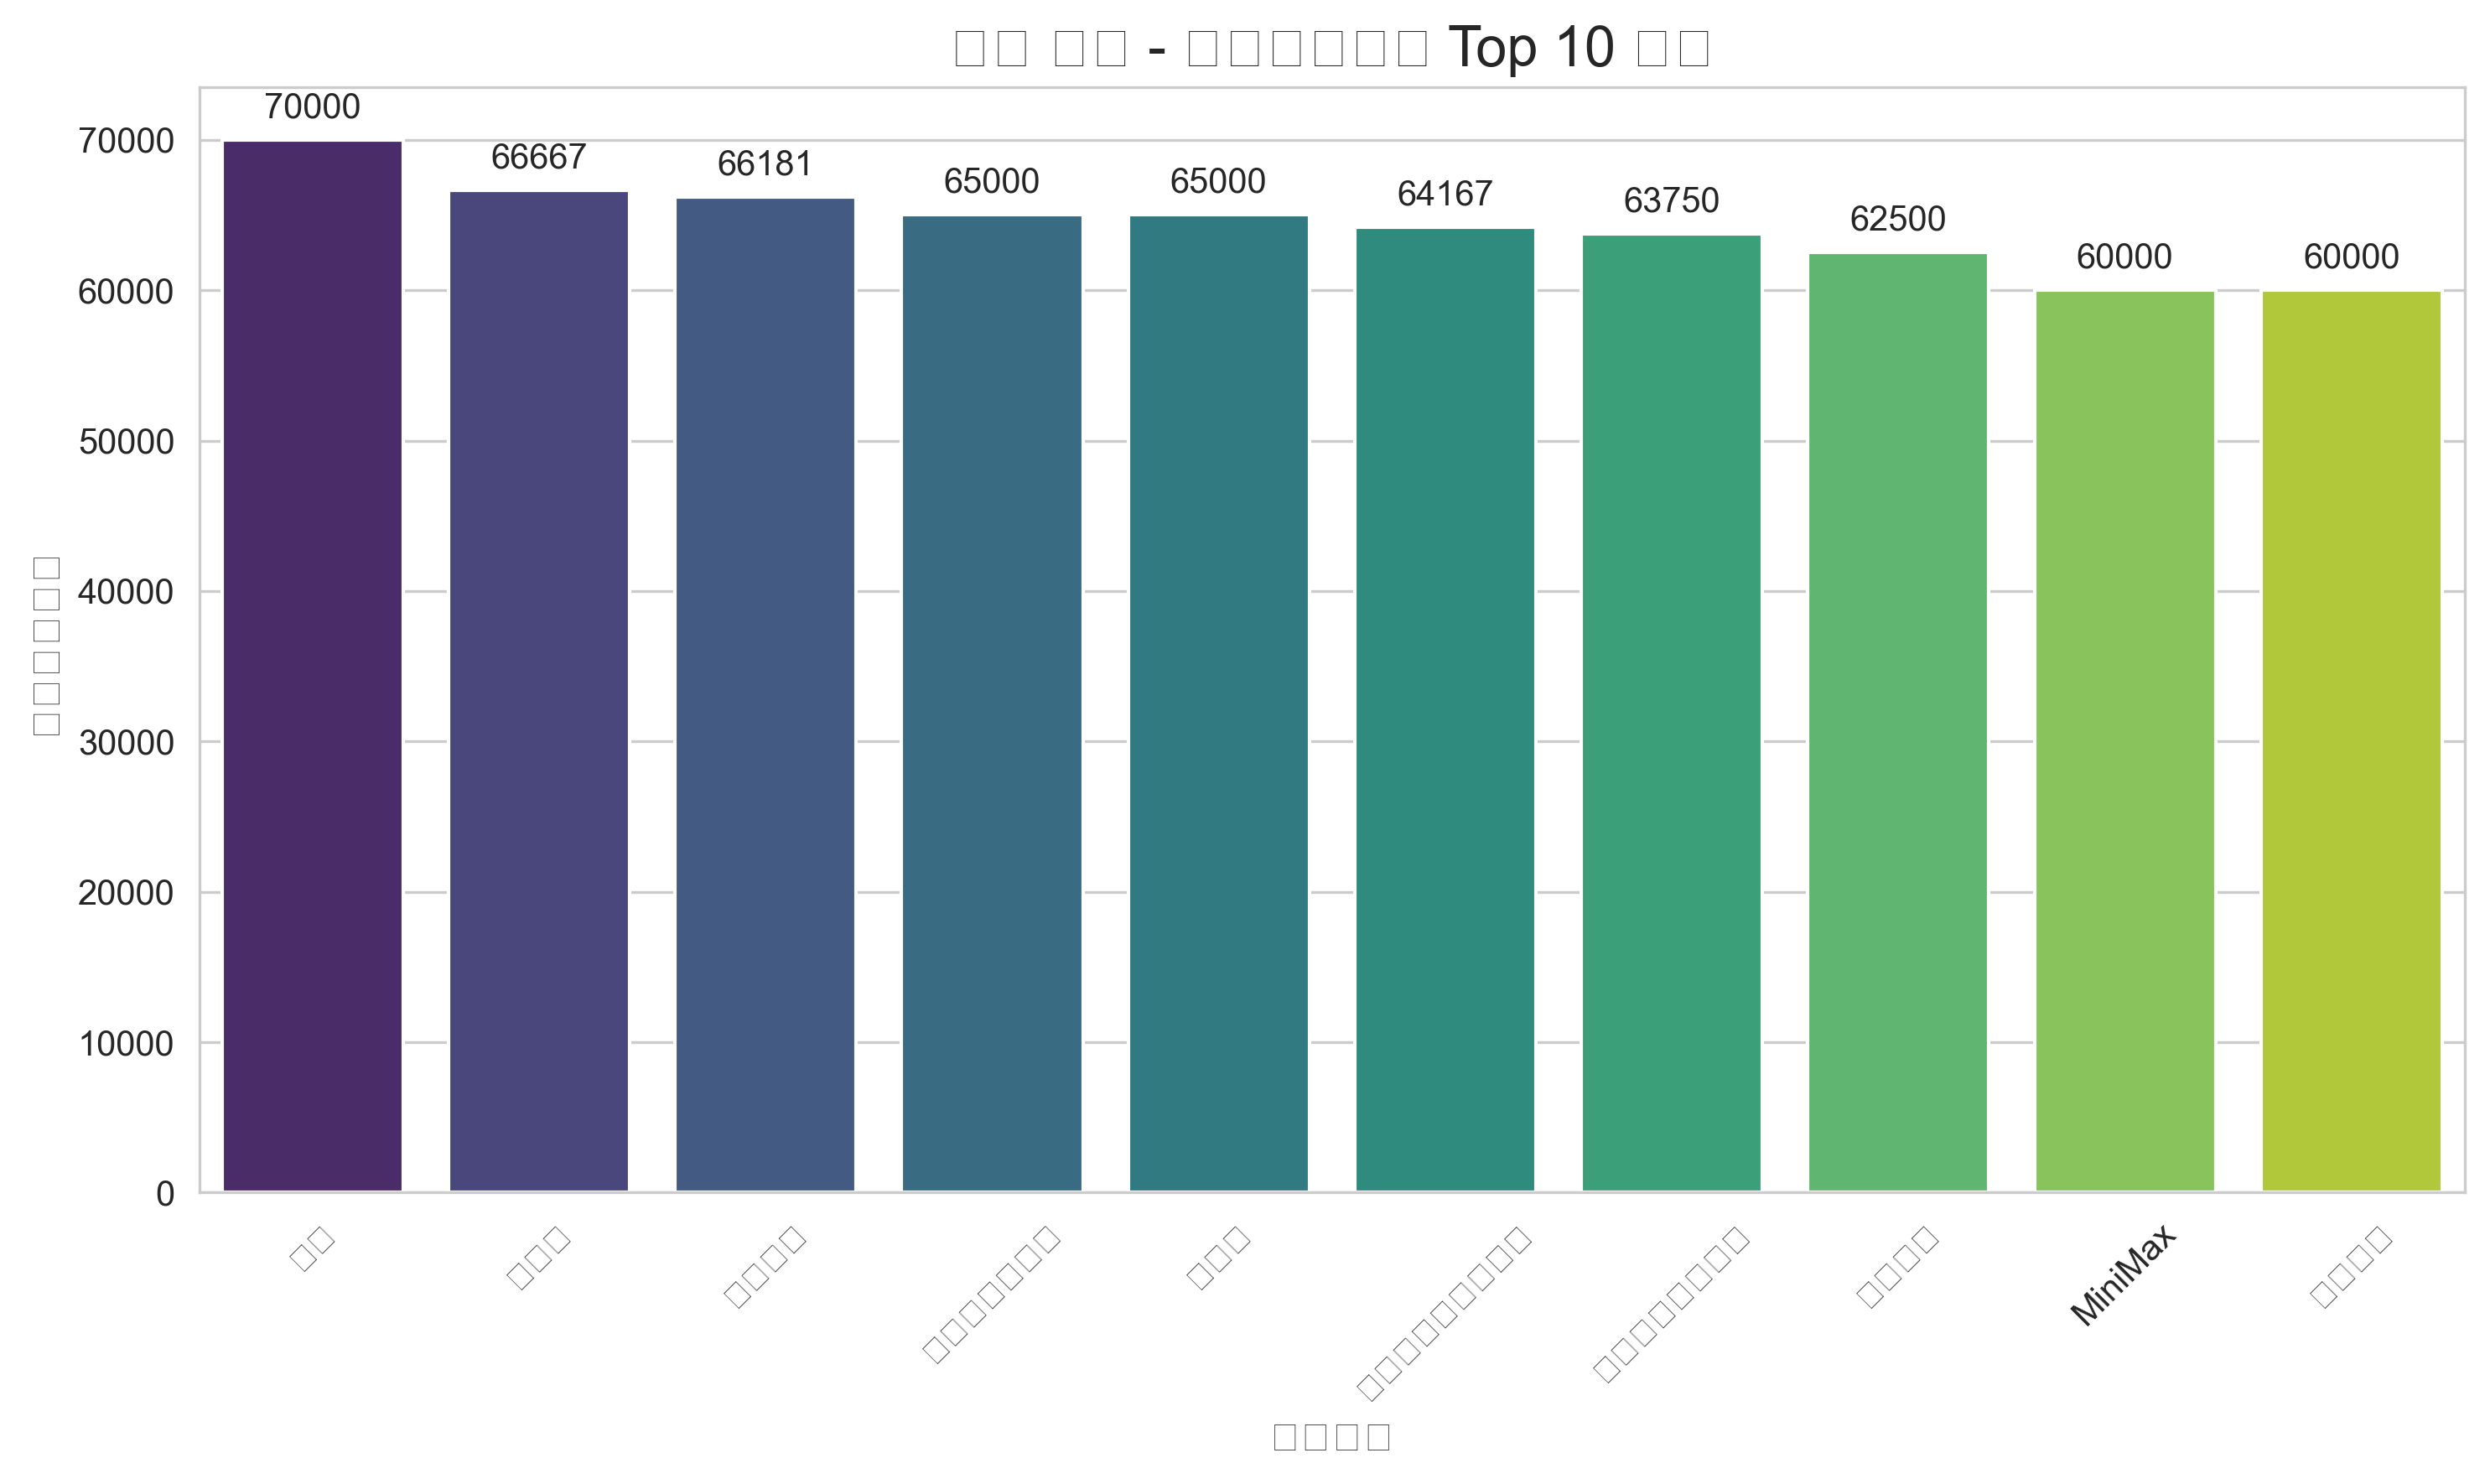

C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ÂÖ¨Âè∏ÂêçÁß∞', y='Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº', data=top10, palette='viridis')
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 33410 (\N{CJK UNIFIED IDEOGRAPH-8282}) missing fro

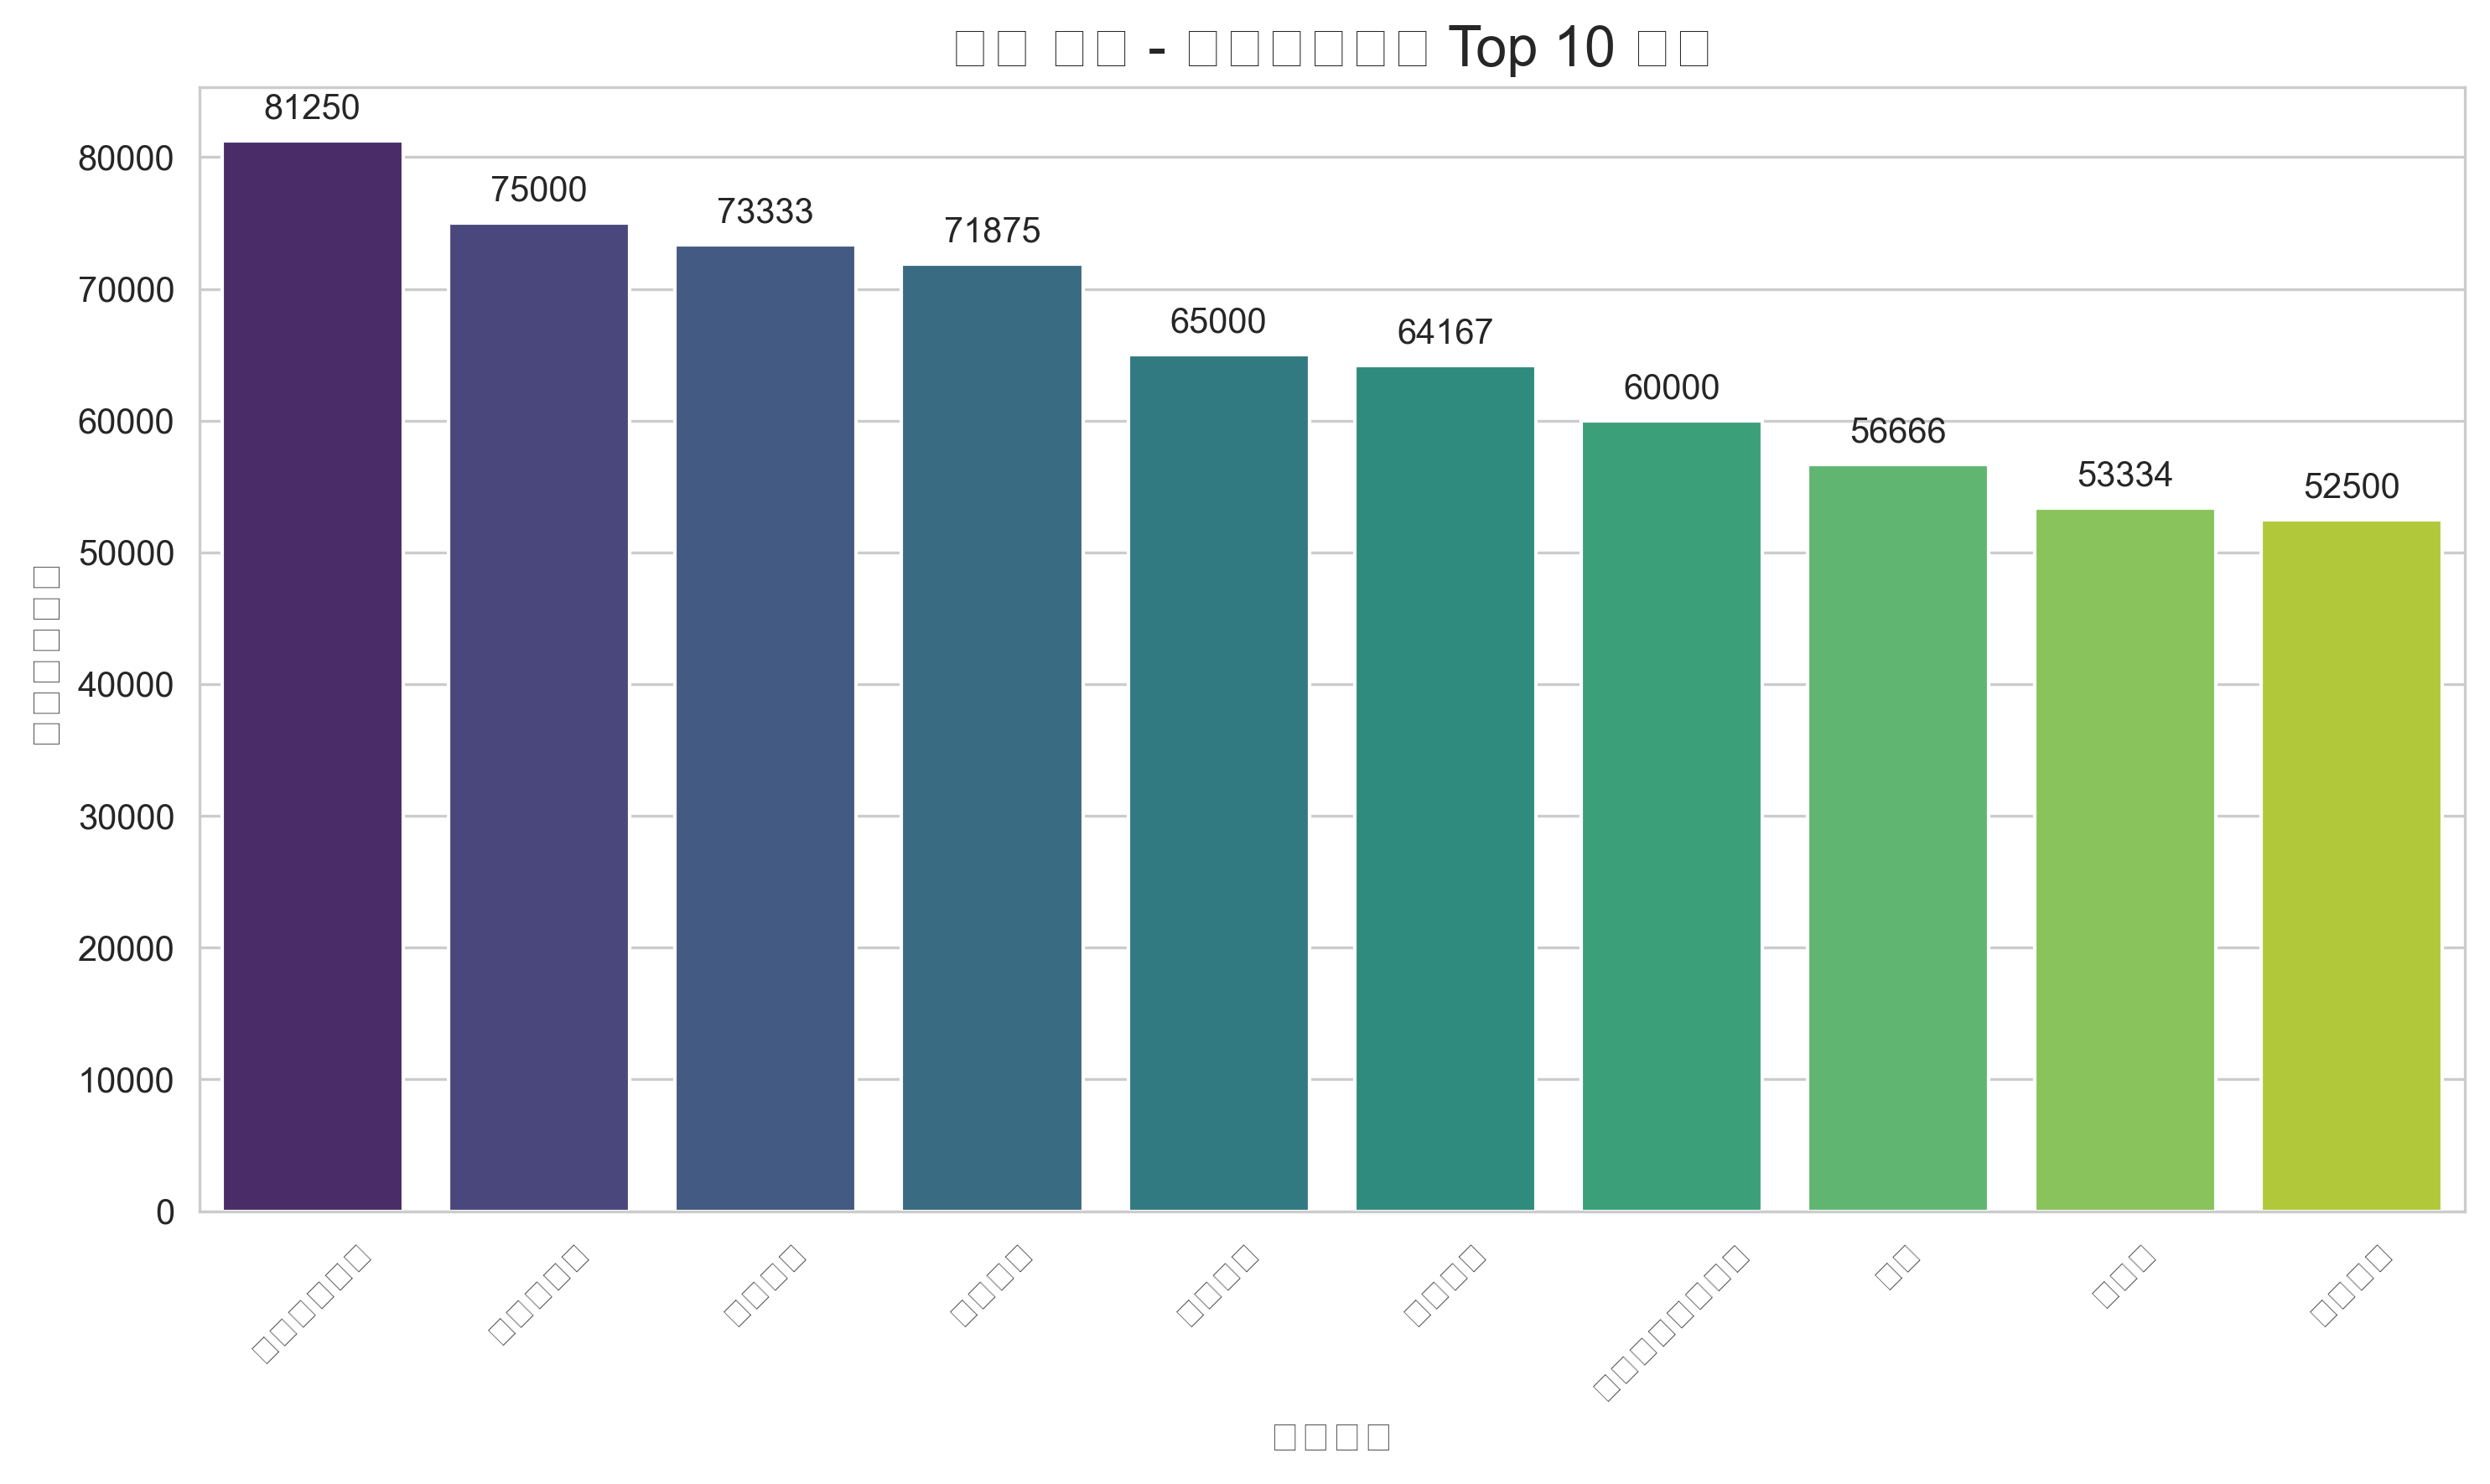

C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ÂÖ¨Âè∏ÂêçÁß∞', y='Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº', data=top10, palette='viridis')
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 24322 (\N{CJK UNIFIED IDEOGRAPH-5F02}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 24785 (\N{CJK UNIFIED IDEOGRAPH-60D1}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 20256 (\N{CJK UNIFIED IDEOGRAPH-4F20}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 23186 (\N{CJK UNIFIED IDEOGRAPH-5A92}) missing fro

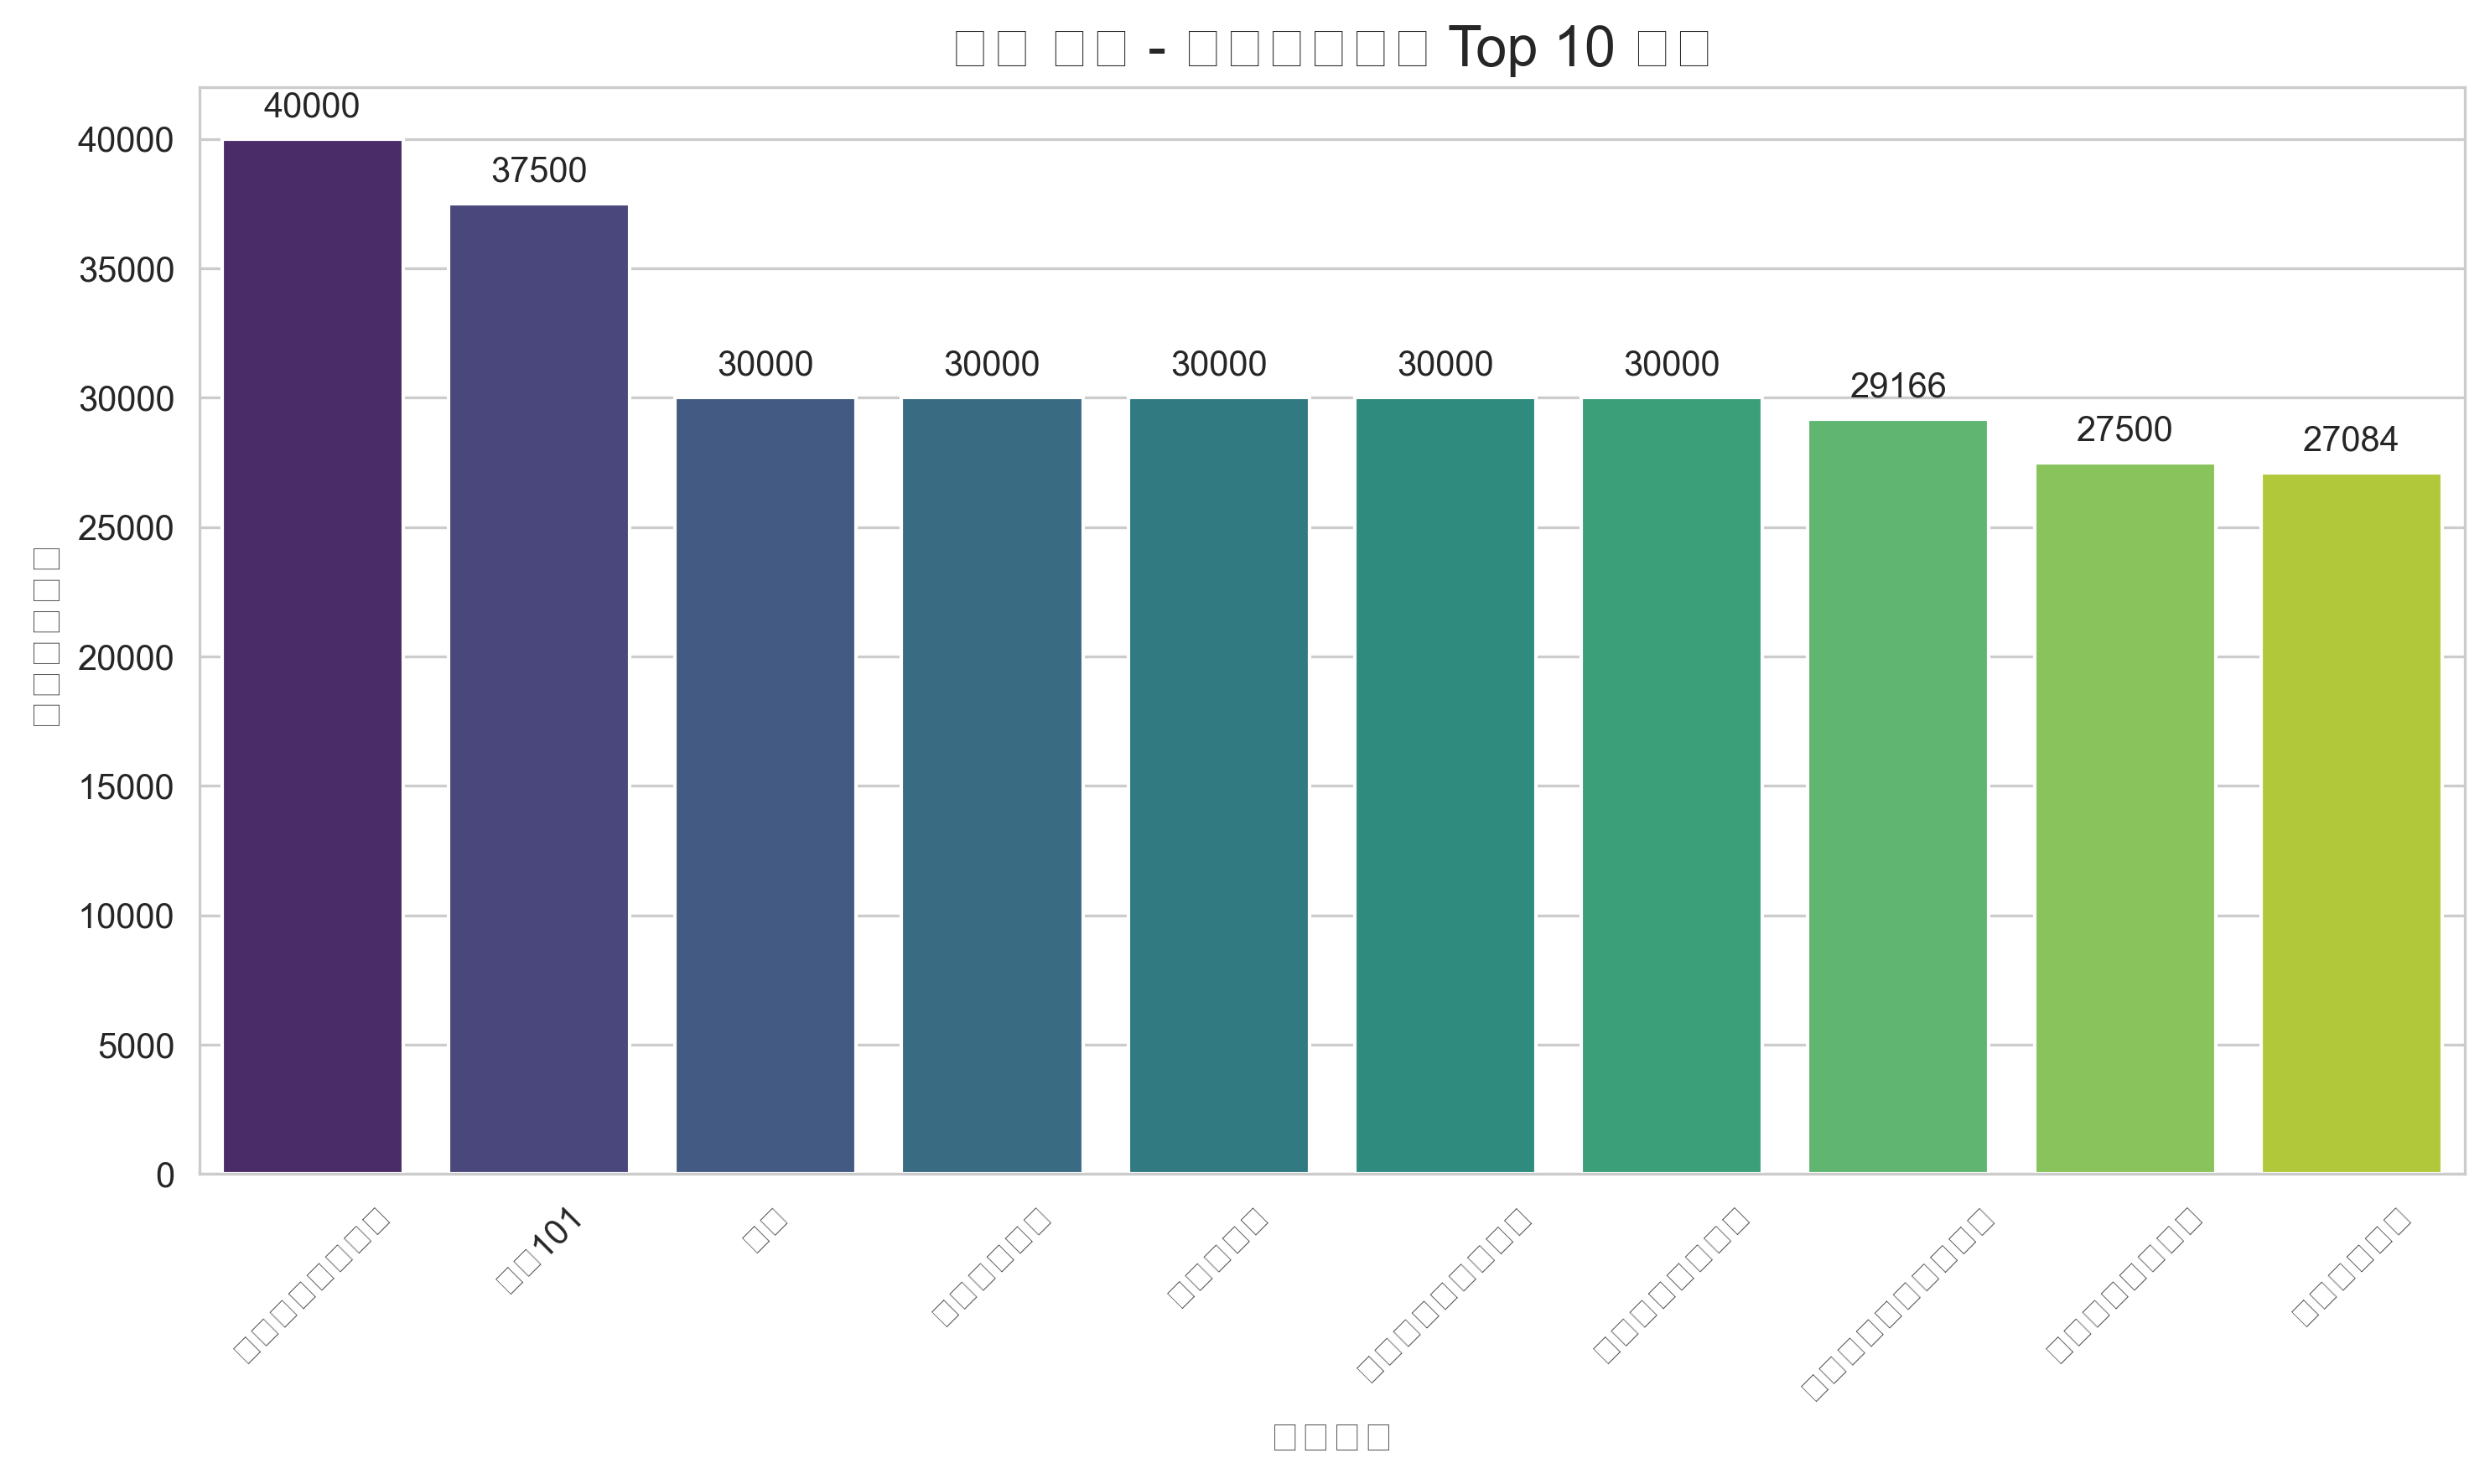

C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ÂÖ¨Âè∏ÂêçÁß∞', y='Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº', data=top10, palette='viridis')
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 26234 (\N{CJK UNIFIED IDEOGRAPH-667A}) missing fro

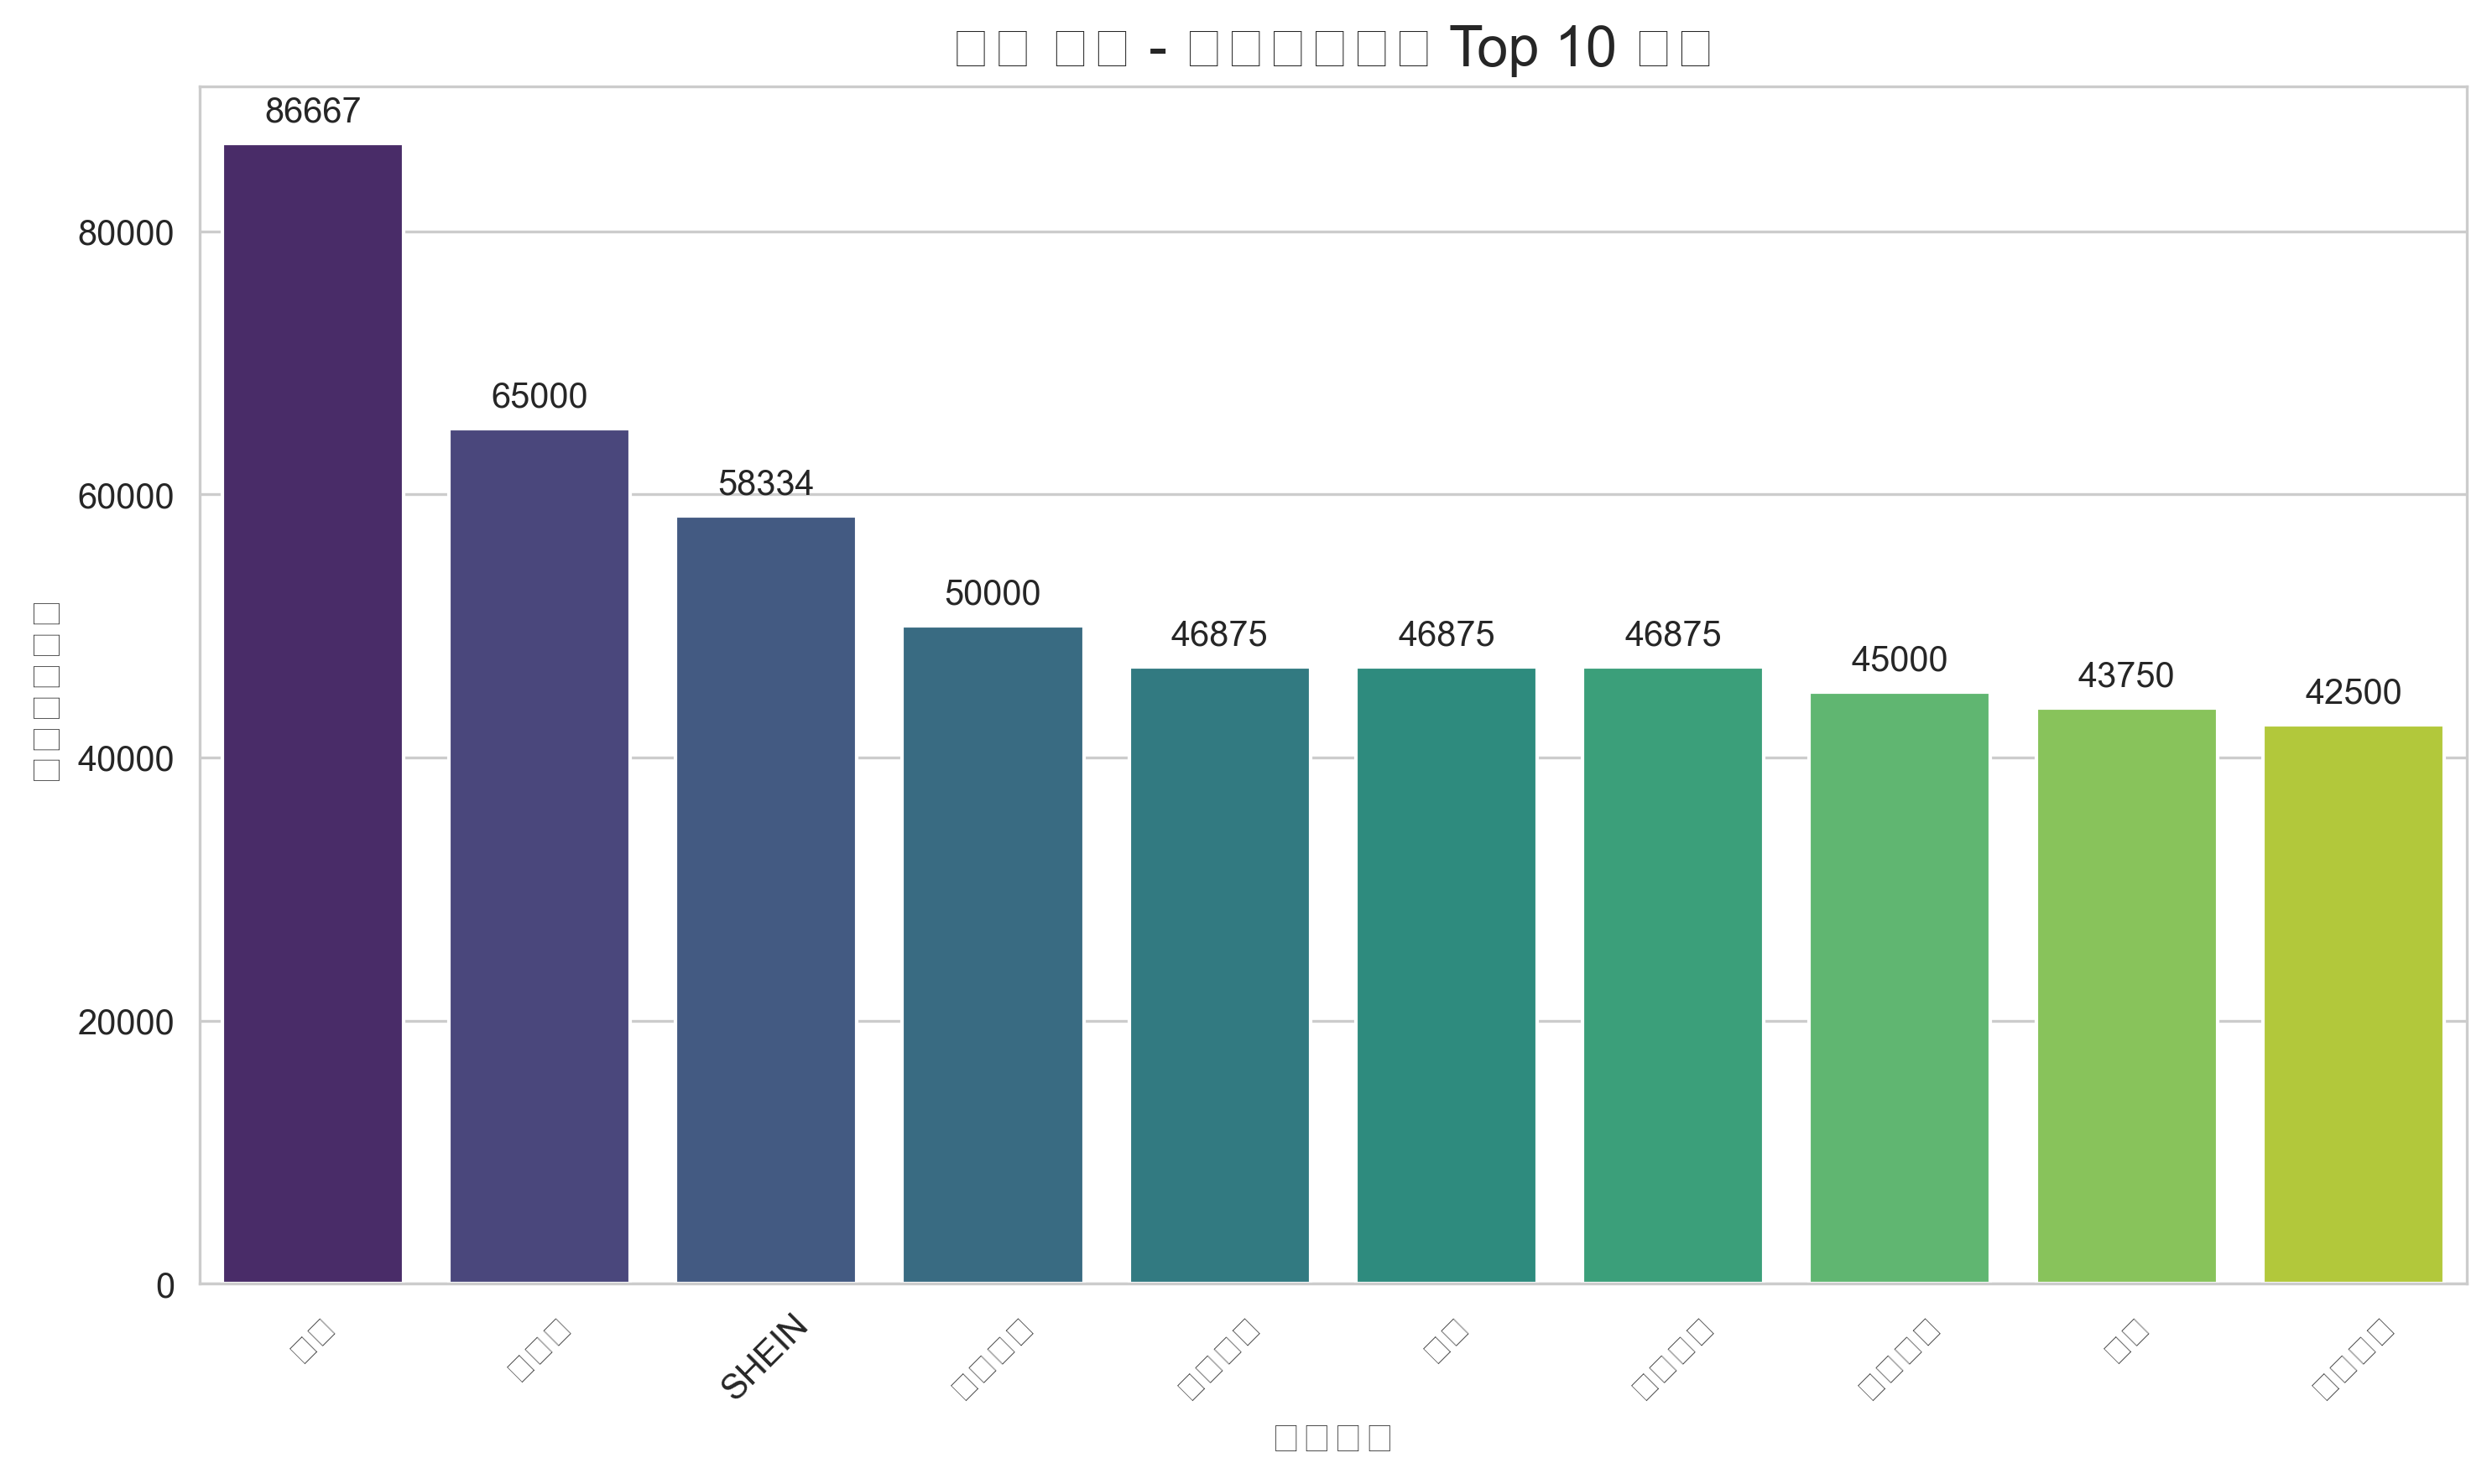

C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ÂÖ¨Âè∏ÂêçÁß∞', y='Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº', data=top10, palette='viridis')
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 34434 (\N{CJK UNIFIED IDEOGRAPH-8682}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 34433 (\N{CJK UNIFIED IDEOGRAPH-8681}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\21711\AppData\Local\Temp\ipykernel_6684\3853639094.py:59: UserWarning: Glyph 22242 (\N{CJK UNIFIED IDEOGRAPH-56E2}) missing fro

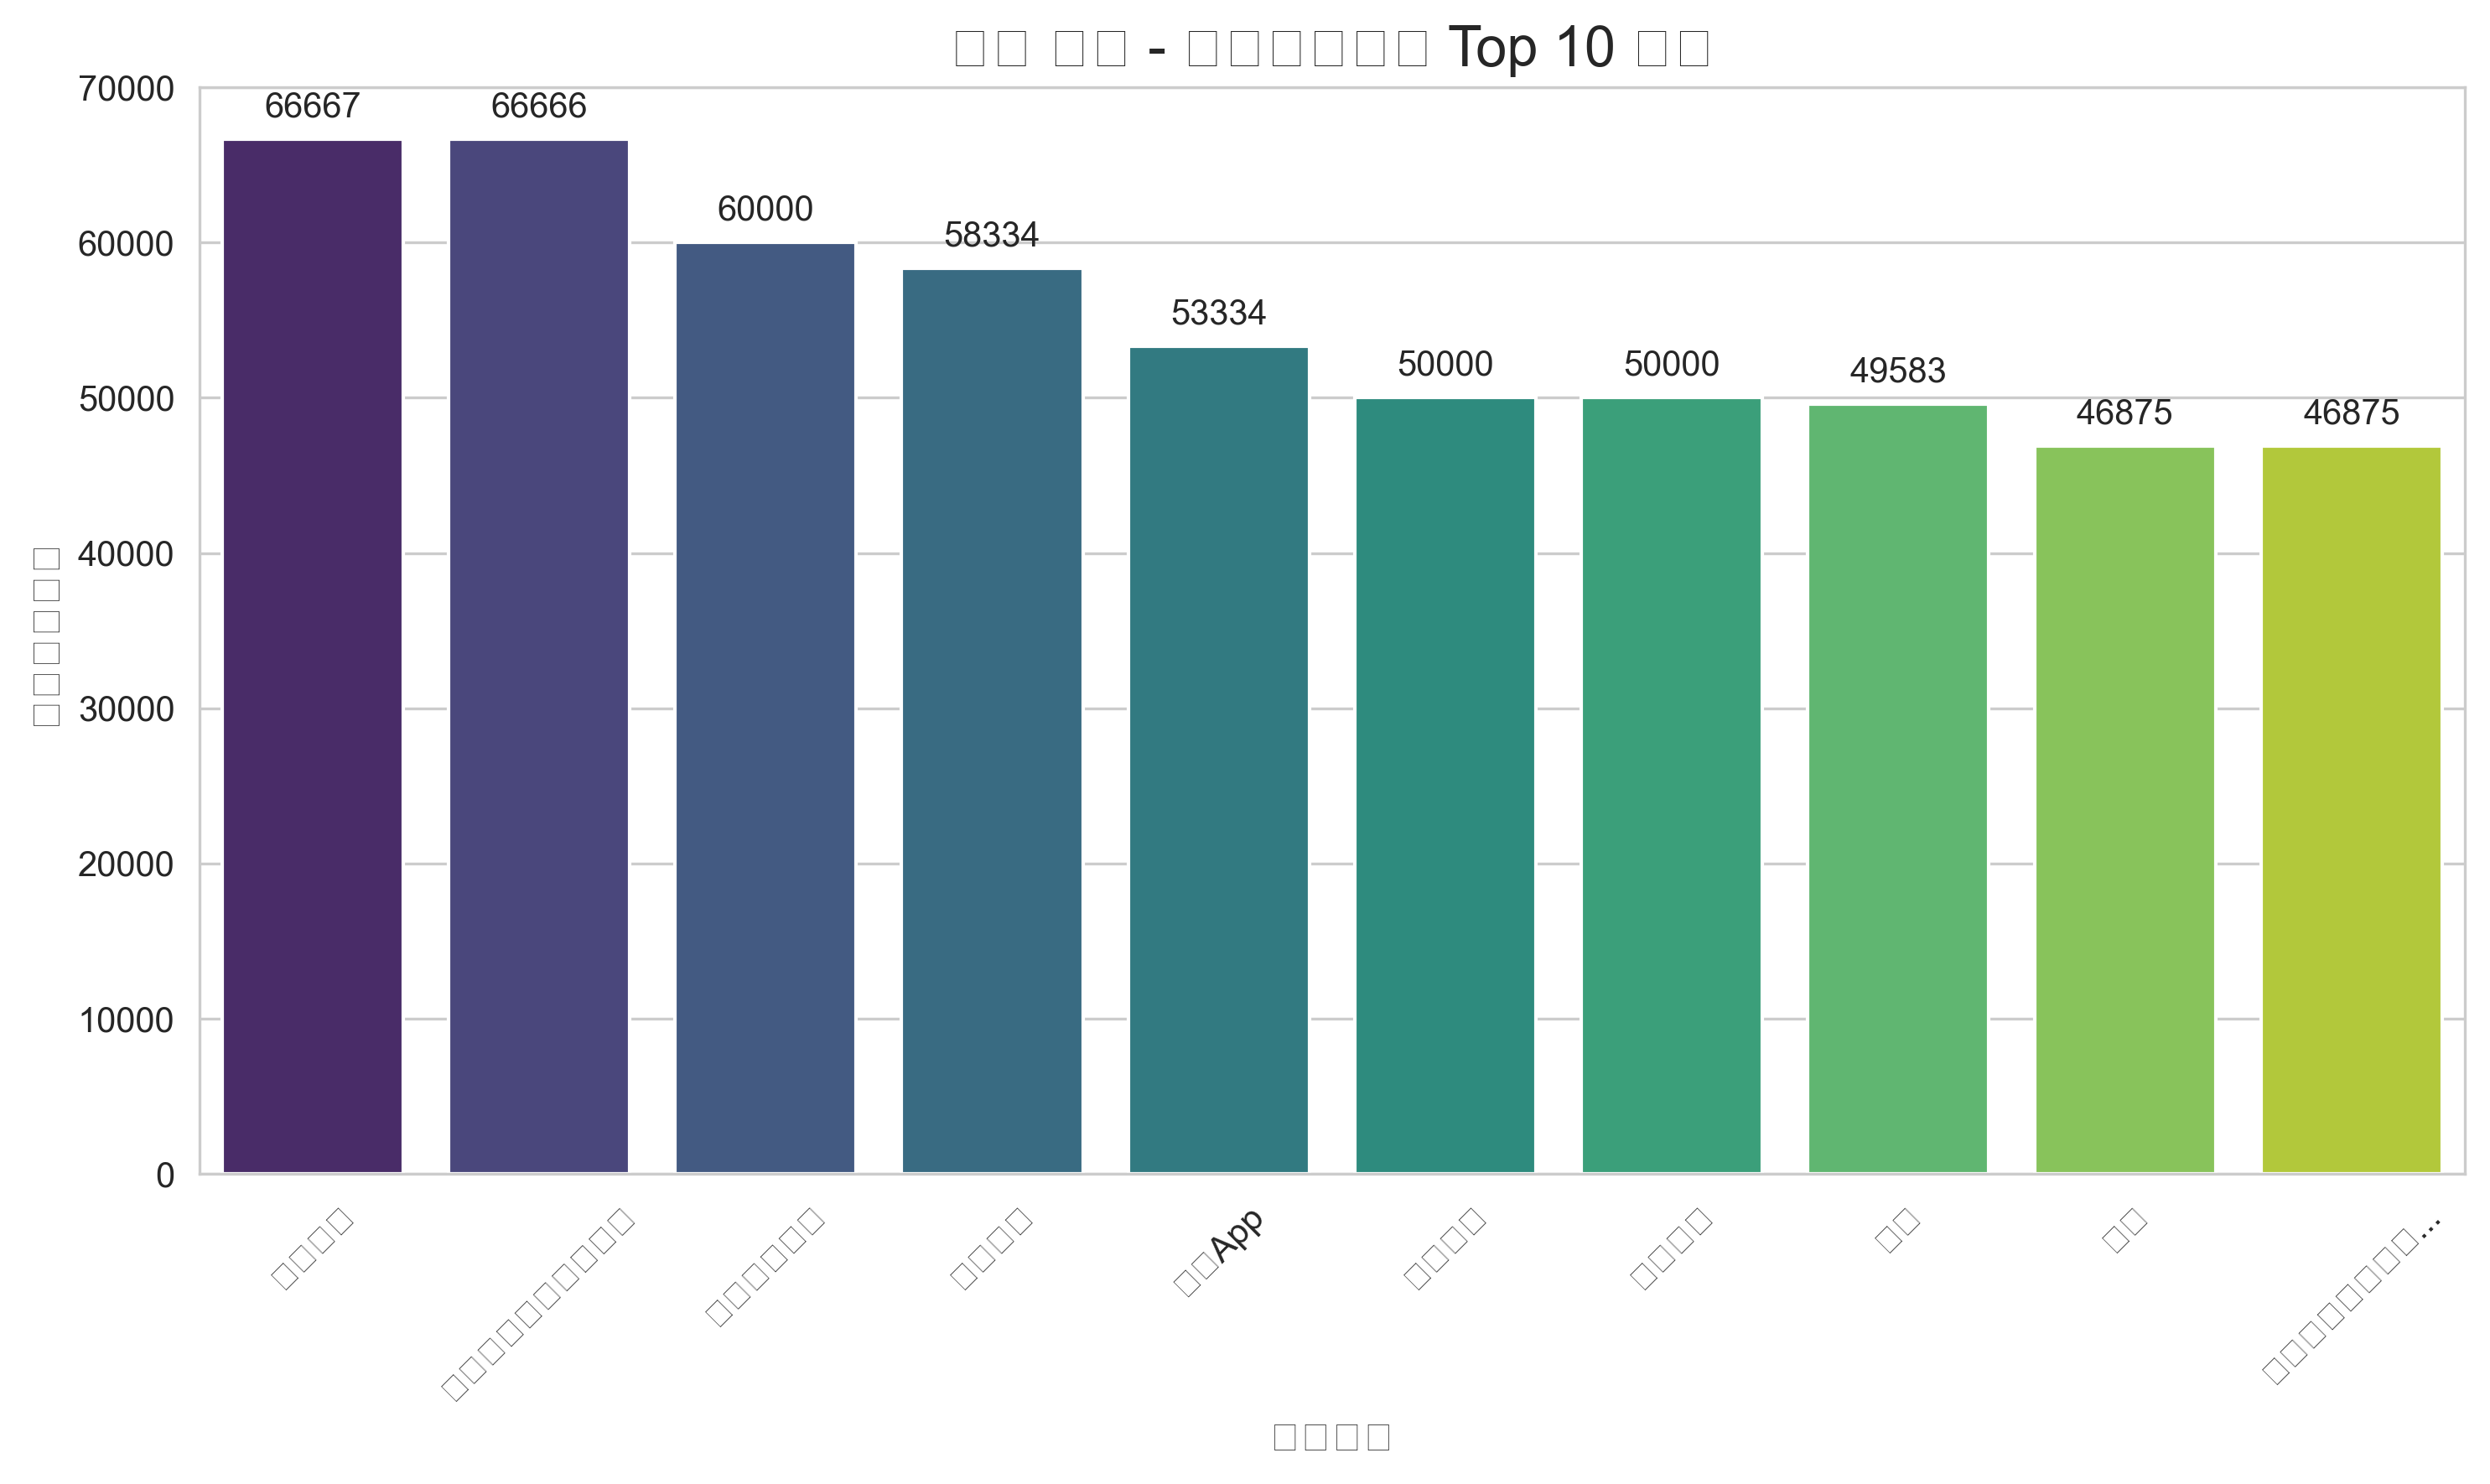

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
font_path = 'C:/Windows/Fonts/msyh.ttc'
# ÂÅáËÆæ df ÊòØ‰Ω†ÁöÑ DataFrame
# df = pd.read_csv('your_file.csv')

# ÂÆö‰πâÈáçÁÇπÂüéÂ∏Ç
cities = ['Âåó‰∫¨', '‰∏äÊµ∑', 'ÂπøÂ∑û', 'Ê∑±Âú≥', 'Êù≠Â∑û']

# ËÆæÁΩÆÂõæÁâáÊ∏ÖÊô∞Â∫¶
plt.rcParams['figure.dpi'] = 300

# ËÆæÁΩÆ seaborn Ê†∑Âºè
sns.set_style("whitegrid")

# ÈÅçÂéÜÊØè‰∏™ÂüéÂ∏ÇÂàÜÂà´ÂàóÂá∫Ââç10ÂÖ¨Âè∏
for city in cities:
    # Á≠õÈÄâÂΩìÂâçÂüéÂ∏Ç
    city_df = df[df['ÂèëÂ∏ÉÂüéÂ∏Ç'] == city]

    # ÊåâÂÖ¨Âè∏ÂàÜÁªÑÊ±ÇÂπ≥ÂùáËñ™ËµÑ
    top10 = (
        city_df.groupby('ÂÖ¨Âè∏ÂêçÁß∞')['ÊúàËñ™‰∏≠ÂÄº']
        .mean()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )

    # Ê†ºÂºèÁæéÂåñËæìÂá∫
    top10.columns = ['ÂÖ¨Âè∏ÂêçÁß∞', 'Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº']

    # ÂàõÂª∫ÁîªÂ∏É
    plt.figure(figsize=(10, 6))

    # ÁªòÂà∂Êü±Áä∂Âõæ
    ax = sns.barplot(x='ÂÖ¨Âè∏ÂêçÁß∞', y='Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº', data=top10, palette='viridis')

    # Ê∑ªÂä†Êï∞ÊçÆÊ†áÁ≠æ
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    # ËÆæÁΩÆÊ†áÈ¢òÂíåÂùêÊ†áËΩ¥Ê†áÁ≠æ
    plt.title(f'üèôÔ∏è {city} - Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº Top 10 ÂÖ¨Âè∏', fontsize=16)
    plt.xlabel('ÂÖ¨Âè∏ÂêçÁß∞', fontsize=12)
    plt.ylabel('Âπ≥ÂùáÊúàËñ™‰∏≠ÂÄº', fontsize=12)

    # ÊóãËΩ¨ x ËΩ¥Ê†áÁ≠æ
    plt.xticks(rotation=45)

    # ÊòæÁ§∫ÂõæÂΩ¢
    plt.tight_layout()
    plt.show()
    

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from catboost import CatBoostRegressor
import joblib
import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings("ignore")

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei"]
plt.rcParams['axes.unicode_minus'] = False  # Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò

# Êñá‰ª∂Ë∑ØÂæÑÔºå‰øÆÊîπ‰∏∫‰∏ä‰º†Êñá‰ª∂ÁöÑË∑ØÂæÑ
file_path = "BOSS_Zhipin_Sample_Data.xlsx"

# ËØªÂèñÊï∞ÊçÆ
excel_file = pd.ExcelFile(file_path)
df = excel_file.parse('Sheet1')

# Êü•ÁúãÊï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØ
print("Êï∞ÊçÆÂü∫Êú¨‰ø°ÊÅØÔºö")
df.info()

# Ëñ™ËµÑËΩ¨Êç¢ÂáΩÊï∞ÔºàÊõ¥Á≤æÁ°ÆÔºâ
def convert_salary(salary_str):
    try:
        salary_str = str(salary_str).upper().strip()
        if 'K' in salary_str:
            parts = re.findall(r'(\d+\.?\d*)K?', salary_str)
            if len(parts) == 2:
                min_s, max_s = map(float, parts)
                return (min_s + max_s) / 2 * 1000
            elif len(parts) == 1:
                return float(parts[0]) * 1000
        elif 'W' in salary_str:
            parts = re.findall(r'(\d+\.?\d*)W?', salary_str)
            if len(parts) == 2:
                min_s, max_s = map(float, parts)
                return (min_s + max_s) / 2 * 10000
            elif len(parts) == 1:
                return float(parts[0]) * 10000
        else:
            # Â¶ÇÊûúÊòØÁ∫ØÊï∞Â≠óÔºåÁõ¥Êé•ËøîÂõû
            return float(salary_str)
    except Exception as e:
        return np.nan

# Â∫îÁî®ËΩ¨Êç¢ÂáΩÊï∞
df['Ëñ™ËµÑ(Êï∞ÂÄº)'] = df['Ëñ™ËµÑ'].apply(convert_salary)

# Âà†Èô§Á©∫ÂÄºÂíåÂºÇÂ∏∏ÂÄº
df = df.dropna(subset=['Ëñ™ËµÑ(Êï∞ÂÄº)', 'Â∑•‰ΩúÂú∞ÁÇπ', 'ÁªèÈ™åË¶ÅÊ±Ç', 'Â≠¶ÂéÜË¶ÅÊ±Ç', 'ÂÖ¨Âè∏ËßÑÊ®°', 'ÂÖ¨Âè∏Ë°å‰∏ö'])

# ÂºÇÂ∏∏ÂÄºÂâîÈô§ÔºàIQRÊ≥ïÔºâ
Q1 = df['Ëñ™ËµÑ(Êï∞ÂÄº)'].quantile(0.25)
Q3 = df['Ëñ™ËµÑ(Êï∞ÂÄº)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Ëñ™ËµÑ(Êï∞ÂÄº)'] >= (Q1 - 1.5 * IQR)) & (df['Ëñ™ËµÑ(Êï∞ÂÄº)'] <= (Q3 + 1.5 * IQR))]

# Ëñ™ËµÑ log ËΩ¨Êç¢ÔºàÁºìËß£ÂÅèÊÄÅÂàÜÂ∏ÉÔºâ
df['Ëñ™ËµÑ_log'] = np.log1p(df['Ëñ™ËµÑ(Êï∞ÂÄº)'])

# Á°Æ‰øù 'ËÅå‰ΩçÂêçÁß∞' ÂàóÂ≠òÂú®Âπ∂Â§ÑÁêÜÁ©∫ÂÄº
df['ËÅå‰ΩçÂêçÁß∞'] = df['ËÅå‰ΩçÂêçÁß∞'].fillna('')

# ÊèêÂèñÊòØÂê¶ÂåÖÂê´ÂÖ≥ÈîÆËØçÔºàAI„ÄÅ‰∫∫Â∑•Êô∫ËÉΩ„ÄÅÊú∫Âô®Â≠¶‰π†Á≠âÔºâ
df['ÊòØÂê¶AIÂ≤ó‰Ωç'] = df['ËÅå‰ΩçÂêçÁß∞'].str.contains('AI|‰∫∫Â∑•Êô∫ËÉΩ|Êú∫Âô®Â≠¶‰π†', case=False, na=False)

# ËΩ¨Êç¢‰∏∫Êï¥Êï∞Á±ªÂûãÔºà0 Êàñ 1Ôºâ
df['ÊòØÂê¶AIÂ≤ó‰Ωç'] = df['ÊòØÂê¶AIÂ≤ó‰Ωç'].astype(int)

# Êñ∞Â¢ûÂüéÂ∏ÇÁ≠âÁ∫ßÁâπÂæÅÔºà‰ΩøÁî®ÂÆâÂÖ®Êò†Â∞ÑÂáΩÊï∞ÈÅøÂÖç NaNÔºâ
def get_city_level(city):
    city_level_map = {
        'Âåó‰∫¨': '‰∏ÄÁ∫øÂüéÂ∏Ç',
        '‰∏äÊµ∑': '‰∏ÄÁ∫øÂüéÂ∏Ç',
        'ÂπøÂ∑û': '‰∏ÄÁ∫øÂüéÂ∏Ç',
        'Ê∑±Âú≥': '‰∏ÄÁ∫øÂüéÂ∏Ç',
        'Êù≠Â∑û': 'Êñ∞‰∏ÄÁ∫ø',
        'ÊàêÈÉΩ': 'Êñ∞‰∏ÄÁ∫ø',
        # ÂèØÁªßÁª≠Êâ©Â±ï...
    }
    return city_level_map.get(city.strip(), 'ÂÖ∂‰ªñ')  # ÈªòËÆ§ÂÄº‰∏∫ "ÂÖ∂‰ªñ"

df['ÂüéÂ∏ÇÁ≠âÁ∫ß'] = df['Â∑•‰ΩúÂú∞ÁÇπ'].apply(get_city_level)

# ÁâπÂæÅ‰∏éÁõÆÊ†áÂèòÈáè
X = df[['Â∑•‰ΩúÂú∞ÁÇπ', 'ÁªèÈ™åË¶ÅÊ±Ç', 'Â≠¶ÂéÜË¶ÅÊ±Ç', 'ÂÖ¨Âè∏ËßÑÊ®°', 'ÂÖ¨Âè∏Ë°å‰∏ö', 'ÊòØÂê¶AIÂ≤ó‰Ωç', 'ÂüéÂ∏ÇÁ≠âÁ∫ß']]
y = df['Ëñ™ËµÑ_log']

# Á±ªÂà´ÁâπÂæÅÂàó
categorical_features = ['Â∑•‰ΩúÂú∞ÁÇπ', 'ÁªèÈ™åË¶ÅÊ±Ç', 'Â≠¶ÂéÜË¶ÅÊ±Ç', 'ÂÖ¨Âè∏ËßÑÊ®°', 'ÂÖ¨Âè∏Ë°å‰∏ö', 'ÂüéÂ∏ÇÁ≠âÁ∫ß']

# Á°Æ‰øùÊâÄÊúâÁ±ªÂà´ÁâπÂæÅÂàóÈÉΩÊòØÂ≠óÁ¨¶‰∏≤Á±ªÂûãÔºåÂπ∂Â°´ÂÖÖÁ©∫ÂÄº
for col in categorical_features:
    X[col] = X[col].fillna('Êú™Áü•').astype(str)

# ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ÂÆö‰πâË∂ÖÂèÇÊï∞ÊêúÁ¥¢Á©∫Èó¥
param_grid = {
    'iterations': [500, 800, 1000],
    'learning_rate': [0.03, 0.05, 0.07],
    'depth': [4, 6, 8]
}

# ÂàùÂßãÂåñ CatBoost Ê®°Âûã
model = CatBoostRegressor(eval_metric='RMSE', verbose=0, early_stopping_rounds=30, random_state=42,
                          cat_features=categorical_features)

# ‰ΩøÁî® GridSearchCV ËøõË°åË∂ÖÂèÇÊï∞ÊêúÁ¥¢
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train, eval_set=(X_test, y_test))

# Ëé∑ÂèñÊúÄ‰ºòÊ®°Âûã
best_model = grid_search.best_estimator_

# È¢ÑÊµãÂπ∂ËøòÂéüÂõûÂéüÂßãÂçï‰Ωç
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test.values)  # ËΩ¨‰∏∫ numpy array ÈÅøÂÖçÁ¥¢ÂºïÈóÆÈ¢ò

# ËØÑ‰º∞ÊåáÊ†á
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)

print(f"\nÊ®°ÂûãËØÑ‰º∞ÁªìÊûúÔºàÂèçÂèòÊç¢ÂêéÔºâÔºö")
print(f"MSE: {mse:.2f}")
print(f"R¬≤: {r2:.4f}")
print(f"MAE: {mae:.2f}")

# ‰øùÂ≠òÊ®°Âûã
joblib.dump(best_model, 'salary_predictor_catboost.pkl')

# ÁªòÂõæÈÉ®ÂàÜÔºöÈ¢ÑÊµã vs ÂÆûÈôÖÂÄº
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original, y=y_pred, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', linestyle='--')
plt.title('ÂÆûÈôÖËñ™ËµÑ vs È¢ÑÊµãËñ™ËµÑ')
plt.xlabel('ÂÆûÈôÖËñ™ËµÑ')
plt.ylabel('È¢ÑÊµãËñ™ËµÑ')
plt.show()

# ÊÆãÂ∑ÆÂàÜÊûê
residuals = y_test_original - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('ÊÆãÂ∑ÆÂàÜÂ∏É')
plt.xlabel('ÊÆãÂ∑Æ')
plt.ylabel('È¢ëÊ¨°')
plt.show()

# ÁâπÂæÅÈáçË¶ÅÊÄß
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# ‰ΩøÁî®Â≠ó‰ΩìÁÆ°ÁêÜÂô®ÁªòÂà∂‰∏≠ÊñáÊ†áÈ¢ò
zh_font = fm.FontProperties(fname='C:/Windows/Fonts/simhei.ttf')  # Ê†πÊçÆÁ≥ªÁªüË∑ØÂæÑË∞ÉÊï¥

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('ÁâπÂæÅÈáçË¶ÅÊÄß', fontproperties=zh_font)
plt.xlabel('ÈáçË¶ÅÊÄß', fontproperties=zh_font)
plt.ylabel('ÁâπÂæÅ', fontproperties=zh_font)
plt.yticks(fontproperties=zh_font)
plt.tight_layout()
plt.show()

# Á§∫‰æãÈ¢ÑÊµã
new_data = pd.DataFrame({
    'Â∑•‰ΩúÂú∞ÁÇπ': ['Âåó‰∫¨'],
    'ÁªèÈ™åË¶ÅÊ±Ç': ['3-5Âπ¥'],
    'Â≠¶ÂéÜË¶ÅÊ±Ç': ['Êú¨Áßë'],
    'ÂÖ¨Âè∏ËßÑÊ®°': ['100-499‰∫∫'],
    'ÂÖ¨Âè∏Ë°å‰∏ö': ['‰∫íËÅîÁΩë'],
    'ÊòØÂê¶AIÂ≤ó‰Ωç': [0],
    'ÂüéÂ∏ÇÁ≠âÁ∫ß': ['‰∏ÄÁ∫øÂüéÂ∏Ç']
})

# È¢ÑÊµã
pred_log = best_model.predict(new_data)
pred_salary = np.expm1(pred_log)

print("\nÁ§∫‰æãÈ¢ÑÊµãÁªìÊûúÔºö")
print(f"ËæìÂÖ•ÁâπÂæÅ:")
print(new_data.to_string(index=False))
print(f"È¢ÑÊµãËñ™ËµÑ: {pred_salary[0]:.2f} ÂÖÉ")

<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
C:\Users\21711\AppData\Local\Temp\ipykernel_2936\1516547629.py:20: SyntaxWarning: invalid escape sequence '\c'
  file_path = "D:\coding\Study_code\HUAT-kerwin-labwork\Êï∞ÊçÆÂàÜÊûê‰∏éÂèØËßÜÂåñËØæÁ®ãËÆæËÆ°\boos\BOSS_Zhipin_Sample_Data.xlsx"


OSError: [Errno 22] Invalid argument: 'D:\\coding\\Study_code\\HUAT-kerwin-labwork\\Êï∞ÊçÆÂàÜÊûê‰∏éÂèØËßÜÂåñËØæÁ®ãËÆæËÆ°\x08oos\\BOSS_Zhipin_Sample_Data.xlsx'